In [1]:
# imports
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.time import Time
import os
import numpy as np
import math as m
from astropy import units as u
from astropy.table import Table
from astropy.time import Time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
from cycler import cycler
import matplotlib.gridspec as gridspec # GRIDSPEC 
from scipy.optimize import curve_fit
from math import cos, pi,sqrt
from astropy.constants import G, c, M_sun
from astropy import units as u
from scipy.stats import spearmanr
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from scipy.odr import *
%matplotlib qt

In [2]:
def read_comp_diskbb(comp_file):
    data = np.genfromtxt(comp_file, delimiter='\t', names=True, dtype=("U23", "U13", "U14", "U11", 
                                                                       "<f8", "<f8", "<f8", 
                                                                       "<f8", "<f8", "<f8",
                                                                      "<f8", "<f8", "<f8"),
                        converters={5:linked_to_errors, 6:linked_to_errors, 8:linked_to_errors, 9:linked_to_errors, 10: logtoflux, 11: logtoflux_bounds, 12: logtoflux_bounds})

    if len(np.atleast_1d(data))==1:
        data = np.array([data])
    data.sort(order='epoch')
    return data


def read_pulsations_file(file):
    data = np.genfromtxt(file, delimiter='\t', names=True, dtype=("U23", "U13", "U14", "U11", 
                                                                       "i8", "f8", "f8"), 
                         missing_values={4:"", 5:"", 6:""}, filling_values={4:-1, 5:-1}, 
                         converters={})
    if len(np.atleast_1d(data))==1:
        data = np.array([data])
    data.sort(order='epoch')
    return data

def pulsations_to_color(pulsations, pulse_fractions):
    color_list = []
    for pulsation, pulse_fraction in zip(pulsations, pulse_fractions):
        if int(pulsation)==-1:
            color = "white"
        elif int(pulsation)==0:
            color = "red"
        elif int(pulsation)==1:
            color = "green"
        else:
            color="white"
        color_list.append(color)
    return np.array(color_list)

def pulse_fraction_to_color(pulse_fraction, pulsations):
    if float(pulsations)==-1:
        return "white"
    elif int(pulsations)==0:
        return "red"
        pulse_fraction * 0.2
    elif int(pulsations)==1:
        return "green"
    cmap = cm.get_cmap('Wistia')
    color = cmap(float(pulse_fraction)/40)
    return color

def pulsation_to_color(pulsation):
    if pulsation==0:
        return "red"
    elif pulsation==1:
        return "green"
    elif pulsation==-1:
        return "white"
    else:
        return "white"
def read_tbabs(comp_file):
    data = np.genfromtxt(comp_file, delimiter='\t', names=True, dtype=("U23", "U11", "U14", "U10", 
                                                                       "<f8", "<f8", "<f8"), 
                         converters={5:linked_to_errors, 6:linked_to_errors})
    if len(np.atleast_1d(data))==1:
        data = np.array([data])
    data.sort(order='epoch')
    return data

def linked_to_errors(x):
    if float(x)==-3:
        return 0.0000001
    elif float(x)==-5:
        print("Limit found")
        return 0
    else:
        return x


def read_comp_cutoffpl(comp_file):
    data = np.genfromtxt(comp_file, delimiter='\t', names=True, 
                         dtype=("U23", "U13", "U7", "U14", "<f8", "<f8", "<f8", 
                                "<f8", "<f8", "<f8","<f8", "<f8", "<f8",
                               "<f8", "<f8", "<f8"), 
                         converters={13: logtoflux, 14: logtoflux_bounds, 
                                     15: logtoflux_bounds})
    if len(np.atleast_1d(data))==1:
        data = np.array([data])
    data.sort(order='epoch')
    return data

def read_comp_compTT(comp_file):
    data = np.genfromtxt(comp_file, delimiter='\t', names=True, 
                         dtype=("U23", "U13", "U7", "U14", "<f8", "<f8", "<f8", 
                          "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8",
                          "<f8", "<f8", "<f8", "<f8", "<f8", "<f8","<f8", "<f8", "<f8"), 
                         converters={22: logtoflux, 23: logtoflux_bounds, 
                                     24: logtoflux_bounds})
    if len(np.atleast_1d(data))==1:
        data = np.array([data])
    data.sort(order='epoch')
    return data

def read_comp_simpl(comp_file):
    data = np.genfromtxt(comp_file, delimiter='\t', names=True, 
                         dtype=("U23", "U13", "U7", "U14", "<f8", "<f8", "<f8", "<f8", "<f8", 
                                "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8"), 
                         converters={5:linked_to_errors, 6:linked_to_errors, 8:linked_to_errors, 
                                     9:linked_to_errors, 13:logtoflux, 14:logtoflux_bounds, 15:logtoflux_bounds})
    if len(np.atleast_1d(data))==1:
        data = np.array([data])
    data.sort(order='epoch')
    return data

def tojd (x):
    return Time(x).jd
     
def logtoflux_bounds(x):
    # keep upper and lower bounds to 0
    if float(x)==0:
        print("Flux bound found")
        return 0
    elif float(x)==-1:
        print("Warning; error in flux computation detected")
        return 0
    else:
        return m.pow(10,float(x))
    
def logtoflux(x):
    if float(x)==-1:
        print("Warning; error in flux computation detected")
        return 0
    return m.pow(10,float(x))

def read_flux_data_old(flux_file):
    data = np.genfromtxt(flux_file, delimiter='\t', names=True, 
                         dtype=("U23", "U13", "U7", "U12", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", 
                                "<f8", "<f8", "<f8", "<f8", "<f8", "<f8"), 
                         missing_values='Error',
                         converters={4: logtoflux, 5: logtoflux_bounds, 6: logtoflux_bounds, 
                                    7: logtoflux, 8: logtoflux_bounds, 
                                   9: logtoflux_bounds, 10: logtoflux, 11: logtoflux_bounds, 12: logtoflux_bounds,
                                    13: logtoflux, 14: logtoflux_bounds, 15: logtoflux_bounds}, 
                         filling_values=0)
    data.sort(order='epoch')
    return data

def read_flux_data(flux_file):
    data = np.genfromtxt(flux_file, delimiter='\t', names=True, 
                         dtype=("U23", "U13", "U7", "U12", "<f8", "<f8", "<f8", 
                                "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", 
                                "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8", "<f8"), 
                         missing_values='Error',
                         converters={4: logtoflux, 5: logtoflux_bounds, 6: logtoflux_bounds, 
                                    7: logtoflux, 8: logtoflux_bounds, 
                                   9: logtoflux_bounds, 10: logtoflux, 11: logtoflux_bounds, 12: logtoflux_bounds,
                                    13: logtoflux, 14: logtoflux_bounds, 15: logtoflux_bounds,
                                    16: logtoflux, 17: logtoflux_bounds, 18: logtoflux_bounds, 
                                    19: logtoflux, 20: logtoflux_bounds, 21: logtoflux_bounds, 
                                    22: logtoflux, 23: logtoflux_bounds, 24: logtoflux_bounds}, 
                         filling_values=0)
    data.sort(order='epoch')
    return data

def remove_legend_repetitions(ax, fontsize=20):
    """Removes any repetead entries in the legend. Adds the legend to the plot too.
    Parameters
    ----------
    ax : The axis were the repeated entries are to be removed. """
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best', prop={'size': fontsize})

def bounds_to_errors(values, lowerbounds, upperbounds):
    ''' Compute errors given the lower and upper bounds of a an array of values.
    Parameters:
    -----------
    value : the central values given by the fit
    lowerbound : its lower bounds
    upperbound : its upper bounds'''

    lower_errors = values - lowerbounds
    upper_errors = upperbounds - values
    
    for value, lowerbound, upperbound in zip(values, lowerbounds, upperbounds):
        
        if upperbound<value and upperbound!=0:
            print("Warning upperbound is lower than value!!! %.5f < %.5f" % (upperbound, value))
        if lowerbound>value and lowerbound!=0:
            print("Warning lowerbound is higher than value!!! %.5f > %.5f" % (lowerbound, value))
            
    
    uplims = np.zeros(lower_errors.shape)
    # lower bound (upper limit)
    uplims[np.where(lowerbounds==0)] = 1
    lower_errors[np.where(lowerbounds==0)] = (upper_errors[np.where(lowerbounds==0)] - values[np.where(lowerbounds==0)]) * 0.2
    values[np.where(lowerbounds==0)] = upperbounds[np.where(lowerbounds==0)]
    upper_errors[np.where(lowerbounds==0)] = 0
    
    # upper bound found (lower limit)
    lolims = np.zeros(lower_errors.shape)
    lolims[np.where(upperbounds==0)] = 1
    upper_errors[np.where(upperbounds==0)] = (values[np.where(upperbounds==0)] - lower_errors[np.where(upperbounds==0)]) * 0.2
    values[np.where(upperbounds==0)] = lowerbounds[np.where(upperbounds==0)]
    lower_errors[np.where(upperbounds==0)] = 0
   
    return lower_errors, upper_errors, lolims, uplims

def jd_to_daymonthyear(x, pos):
    '''Format the axis to convert from Julian day to real date.'''
    time = Time(x, format='jd')
    time.format = 'iso'
    time.out_subfmt = 'date'
    return time

def compute_ratios(hard_flux, hard_flux_low, hard_flux_high, soft_flux, soft_flux_low, soft_flux_high):
    """Compute hardness ratios given fluxes in two energy bands."""
    ratio = hard_flux / soft_flux
    soft_err_low = soft_flux - soft_flux_low
    soft_err_high = soft_flux_high - soft_flux
    hard_err_low = hard_flux - hard_flux_low
    hard_err_high = hard_flux_high - hard_flux
    ratio_err_low = ((hard_err_low / soft_flux)**2 + (hard_flux * soft_err_low / soft_flux**2)**2)**(1 / 2)
    ratio_err_high = ((hard_err_high / soft_flux)**2 + (hard_flux * soft_err_high / soft_flux**2)**2)**(1 / 2)
    return ratio, ratio_err_low, ratio_err_high


def create_color_array(data_length, cmap='hsv'):
    """Create an array of colors given the length of a dataset. Useful for plots where a unique color is needed for each dataset.

    The returned colors come from the input map (jet by default).

    Parameters
    ----------
    data_length : The length of your data for the color array creation.

    """
    print("Creating color array for %i datasets" % data_length)
    x = np.arange(data_length)
    ys = [i + x + (i * x)**2 for i in range(data_length)]
    setmap = plt.get_cmap(name=cmap)

    colors = setmap(np.linspace(0, 1, len(ys)))
    return colors


def get_markers_array(data_length):
    """Get an array of markers given the length of a dataset. Useful for plots where a unique marker is needed for each dataset.

    There are 17 different markers and after that they are repeated.

    Parameters
    ----------
    data_length : The length of your data for the marker array creation.

    """
    m = ['o', '^', (12, 1, 50), "s", 'v', 'p', 'P',  'd', '*', 'h', (5, 1, 10), (5, 0, 10), 'D', '8' , (10, 1, 20), 
         '<', 'x', '.', '>', (7, 0, 30), (20, 0, 50), '$u$', '1']

    while data_length > len(m):
        m.extend(m)

    return m

def draw_arrows(x, y, colors, ax=None):
    for i in np.arange(1, len(x)):
        if ax==None:
            plt.annotate("", xy=(x[i-1],y[i-1]), xytext=(x[i], y[i]), arrowprops=dict(arrowstyle="<-", shrinkA=10, shrinkB=10, color=colors[i-1]))
        else:
            ax.annotate("", xy=(x[i-1],y[i-1]), xytext=(x[i], y[i]), arrowprops=dict(arrowstyle="<-", shrinkA=10, shrinkB=10, color=colors[i-1]))
def fit_diskbb(fluxes, temperatures, temperatures_errlow, temperatures_errhigh, b=4):
    popt, pconv=curve_fit(diskLvsT, temperatures, fluxes,  
                          sigma=(temperatures_errlow + temperatures_errhigh)/2, 
                          p0=[10**-13,b])
    a, b = popt
    a_err, b_err = np.sqrt(np.diag(pconv))
    return a, b, a_err, b_err
 
    return


def fit_outflow(luminosity, temperatures, luminosity_errlow, luminosity_errhigh):
    popt, pconv=curve_fit(diskLvsT, temperatures, luminosity,  
                          sigma=(luminosity_errlow + luminosity_errhigh)/2, 
                          p0=[1.74,-1])
    a, b = popt
    a_err, b_err = np.sqrt(np.diag(pconv))
    return a, b, a_err, b_err

def diskLvsT(x, a, b):
            return a * x**b
def radius_tomass(r_in):
    return r_in * (c.to("km/s")) ** 2 / 2 / G.to("km**3/kg/s**2") / M_sun
def disknorm_tomass(norm, distance, angle=60): 
    r_in = disknorm_tosize(norm, distance, angle)
    return radius_tomass(r_in)
def disknorm_tosize(norm, distance, angle=60):
    angle_rad = 60 / 360 * 2 * pi
    # mega parsecs to parsecs
    distance = distance * 10 ** 3 
    r_in = np.sqrt(norm/cos(angle_rad)) * (distance / (10)) * u.km
    return r_in
                         
def plotdisk(data, ax, param_1="Tin", param_2="flux"):
    if len(np.atleast_1d(data))>1:
        colors = create_color_array(len(data["epoch"]), "jet")
        markers = get_markers_array(len(data["epoch"]))
    else:
        colors = ["cyan"]
        markers = ['x']
    ax.set_prop_cycle(cycler('color', colors))
    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                         data["%slow" %param_1], 
                                                                                         data["%supp" %param_1])
    param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2], 
                                                                                         data["%slow" %param_2], 
                                                                                         data["%supp" %param_2])
    for index in np.arange(0, len(data["epoch"])):
        if data["xmm_obsid"][index]!="":
            label=data["xmm_obsid"][index]
        else:
            label=data["chandra"][index]

        ax.errorbar(data["%s" %param_1][index], data["%s" %param_2][index] , 
                             xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                             yerr=[[param_2err_low[index]], [param_2err_high[index]]], label=label, 
                             marker="$ f $", xlolims=param_1lolimits[index], xuplims=param_1uplimits[index], 
                             uplims=param_2uplimits[index], lolims=param_2lolimits[index], markersize=10)
def eddington_limit(M):
    return 1.26 * M * 10**38 / 10**39
def bolometric_l(M, m_dot):
    return eddington_limit(M) * (1 + 3/5 * np.log(m_dot))
def t_disk_max(M, m_dot):
    return 1.6 * (M)**(-1/4) * (1 - 0.2 * m_dot**(-1/3))
def t_spherization_max(M, m_dot):
    return 1.5 * (M)**(-1/4) * m_dot**(-1/2) * (1 + 0.3 * m_dot**(-3/4))
def t_photosphere_max(M, m_dot, beta=1, chi=1, epsilon_wind=1/2):
    return 0.8 * (beta * chi / epsilon_wind)**1/2 * M**(-1/4) * m_dot**(-3/4)

In [3]:
def readbroadbandfile(file="broadband_fitting_plot.config"):
    broadband_file = "/home/agurpide/x_ray_data/%s" %file
    plot_config = np.genfromtxt(broadband_file, delimiter="\t\t", dtype=("U13", "U30", "U18", float, float), names=True)
    print(plot_config.dtype)
    return plot_config

In [4]:
radius_tomass(90 * u.km)

<Quantity 30.47489975>

## By source

In [169]:
plot_source="NGC7793P13"

## tbabs vs time

In [37]:
tbabs_figure, tbabs_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile()
colors = create_color_array(len(plot_config["source_dir"])-2, "jet")
tbabs_ax.set_prop_cycle(cycler('color', colors))
common_dir = "/home/agurpide/x_ray_data/"

param_1 = 'nH'
param_2 = "epoch"

for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source!=plot_source:
        continue
    
    else: 
        print("Processing source %s" %plot_source) 
        if os.path.isfile("%s/components/tbabs_1.dat" %source_dir):
            data = read_tbabs("%s/components/tbabs_1.dat" % source_dir)
            if os.path.isfile("%s/components/chandra_tbabs_1.dat" %source_dir):
                chandra_data = read_tbabs("%s/components/chandra_tbabs_1.dat" % source_dir)
                print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
                if len(np.atleast_1d(chandra_data)) == 1:
                    chandra_data = np.array([chandra_data])

                data = np.append(data, chandra_data)
        elif os.path.isfile("%s/components/chandra_tbabs_1.dat" % source_dir):
            print("XMM-Newton data not found")
            data = read_tbabs("%s/components/chandra_tbabs_1.dat" % source_dir)
            print("Found Chandra %d observations" % len(data))
            
    data.sort(order='epoch')
    median_param1 = np.median(data["%s" %param_1])
    mean_param1 = np.mean(data["%s" %param_1])
    print("%s \n median value: %.3f \n mean value: %.3f" %(param_1, median_param1, mean_param1))
    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                             data["%slow" %param_1], 
                                                                                             data["%supp" %param_1])
          
    if "(P)" in source_label:
        marker = 's'
    else:
        marker='.'
    
    tbabs_ax.errorbar(Time(data["epoch"]).jd, data["%s" %param_1] , yerr=[param_1err_low, param_1err_high],
                     label=source_label,uplims=param_1uplimits, lolims=param_1lolimits, fmt=".", ls="solid", ecolor="black")
    tbabs_ax.axhline(y=median_param1, color='red', ls='--', label='median %.3f' %median_param1)
    tbabs_ax.axhline(y=mean_param1,color='red', ls='solid', label='mean %.3f' %mean_param1)

tbabs_ax.set_xlabel("Date")
tbabs_ax.set_ylabel("%s 10$^{22}$ cm$^{-2}$" % param_1)
date_formatter = FuncFormatter(jd_to_daymonthyear)
#plt.xticks(rotation=45)
# save components flux plot
tbabs_ax.xaxis.set_major_formatter(date_formatter)
tbabs_ax.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Creating color array for 14 datasets
Processing source NGC1313X-1
nH 
 median value: 0.197 
 mean value: 0.204


## tbabs vs HID vs flux outflow

In [161]:
tbabs_hid_figure, tbabs_hid_ax = plt.subplots(1, 2, figsize=(32, 10), sharey=True)
    
tbabs_hid_ax[0].set_xlabel("F [2 - 10 keV] / F [0.3 - 2 keV]")
tbabs_hid_ax[0].set_ylabel("%s 10$^{22}$ cm$^{-2}$" % param_1)
tbabs_hid_ax[1].set_xlabel("Flux (0.01 - 100 keV)$_{diskbb_{soft}}$")

plot_config = readbroadbandfile()
common_dir = "/home/agurpide/x_ray_data/"
param_1 = 'nH'
param_2 = 'flux'
comp_flux = 'diskbb_0'
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source!=plot_source:
        continue
    else: 
        tbabs_data = read_tbabs("%s/components/tbabs_1.dat" % source_dir)
        soft_comp_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, comp_flux))
    if os.path.isfile("%s/components/chandra_tbabs_1.dat" %source_dir):
        chandra_tbabsdata = read_tbabs("%s/components/chandra_tbabs_1.dat" % source_dir)
        if len(np.atleast_1d(chandra_tbabsdata)) == 1:
            chandra_tbabsdata = np.array([chandra_tbabsdata])
        tbabs_data = np.append(tbabs_data, chandra_tbabsdata)
        
    if os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, comp_flux)):
        chandra_diskbbdata = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, comp_flux))
        print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
        if len(np.atleast_1d(chandra_diskbbdata)) == 1:
            chandra_diskbbdata = np.array([chandra_diskbbdata])
        soft_comp_data = np.append(soft_comp_data, chandra_diskbbdata)
        
    tbabs_data.sort(order="epoch")
    flux_data = read_flux_data("%s/fluxes/fluxes.dat" %source_dir)
    ratio_soft, ratio_err_low_soft, ratio_err_high_soft = compute_ratios((flux_data["2010"])* constant, 
                                                      (flux_data["2010_lower"])* constant,
                                                                         (flux_data["2010_upper"]) constant , 
                                                      constant*flux_data["0320"], constant*flux_data["0320_lower"],
                                                                         flux_data["0320_upper"]* constant)
    colors = create_color_array(len(flux_data["epoch"]), "jet")
    markers = get_markers_array(len(flux_data["epoch"]))

    tbabs_hid_ax[0].set_prop_cycle(cycler('color', colors))
    tbabs_hid_ax[1].set_prop_cycle(cycler('color', colors))
    for index in np.arange(0, len(tbabs_data["epoch"])):
        if tbabs_data["xmm_obsid"][index]!="":
            label=tbabs_data["epoch"][index]
        else:
            label=tbabs_data["epoch"][index]
        print("Plotting observation %s" % label)
        tbabs_hid_ax[0].errorbar(ratio_soft[index], tbabs_data["%s" %param_1][index] , 
                                 xerr=[[ratio_err_low_soft[index]], [ratio_err_high_soft[index]]], 
                              yerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                              uplims=param_1uplimits[index], lolims=param_1lolimits[index], ls="None"
                              ,markersize=10, fmt="o",label=label, color=colors[index])
    tbabs_data = np.array([tbabs_row for tbabs_row in tbabs_data if tbabs_row["xmm_obsid"] in soft_comp_data["xmm_obsid"] or tbabs_row["chandra"] in soft_comp_data["chandra"]])
    tbabs_data.sort(order="epoch")
    soft_comp_data.sort(order="epoch")
    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(tbabs_data["%s" %param_1], 
                                                                                             tbabs_data["%slow" %param_1], 
                                                                                             tbabs_data["%supp" %param_1])
    soft_comp_err_low, soft_comp_err_high, soft_comp_lolimits, soft_comp_uplimits = bounds_to_errors(soft_comp_data["%s" %param_2], 
                                                                                             soft_comp_data["%slow" %param_2], 
                                                                                             soft_comp_data["%supp" %param_2])
    for index in np.arange(0, len(tbabs_data["epoch"])):
        tbabs_hid_ax[1].errorbar(soft_comp_data["%s" %param_2][index], tbabs_data["%s" %param_1][index] , 
                                 xerr=[[soft_comp_err_low[index]], [soft_comp_err_high[index]]], 
                              yerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                              uplims=param_1uplimits[index], lolims=param_1lolimits[index], xlolims=soft_comp_lolimits[index], 
                                 xuplims=soft_comp_uplimits[index], ls="None"
                              ,markersize=10, fmt="o",label=label, color=colors[index])
        
    
tbabs_hid_ax[0].legend()

SyntaxError: invalid syntax (<ipython-input-161-18143b150035>, line 43)

## both T vs L

In [57]:
flux_time, diskbb_T_ax = plt.subplots(1, 2, figsize=(16, 10))
plot_config = readbroadbandfile()
common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'

components = ["diskbb_0", "diskbb_1"]
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], plot_config["source_name"], plot_config["model_dir"], plot_config["distance"]):
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        for component, comp_ax in zip(components, diskbb_T_ax):
            if source=="M82X-1":
                if component=="diskbb_0":
                    data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" %source_dir)
                else:
                    continue
            else:
                data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, component))
                print("Found XMM-Newton %d observations" % len(data))
                if os.path.isfile("%s/components/chandra_diskbb_0.dat" %source_dir):
                    chandra_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, component))

                    print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
                    #data = np.append(data, chandra_data)

            data.sort(order="epoch")
            colors = create_color_array(len(data["epoch"]), "jet")
            markers = get_markers_array(len(data["epoch"]))

            comp_ax.set_prop_cycle(cycler('color', colors))
            param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                                 data["%slow" %param_1], 
                                                                                                 data["%supp" %param_1])
            param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2], 
                                                                                                 data["%slow" %param_2], 
                                                                                                 data["%supp" %param_2])
            for index in np.arange(0, len(data["epoch"])):
                if data["xmm_obsid"][index]!="":
                    label=data["epoch"][index]
                else:
                    label=data["epoch"][index]
                print("Plotting observation %s" %label)
                comp_ax.errorbar(data["%s" %param_1][index], data["%s" %param_2][index] , 
                                     xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                                     yerr=[[param_2err_low[index]], [param_2err_high[index]]], label=label, 
                                     marker=markers[index], xlolims=param_1lolimits[index], xuplims=param_1uplimits[index], 
                                     uplims=param_2uplimits[index], lolims=param_2lolimits[index], markersize=10)

            #draw_arrows(data["%s" %param_1], data["%s" %param_2], colors, comp_ax)

#plt.yscale("log")
diskbb_T_ax[0].set_xlabel("%s (soft) keV" %param_1)
diskbb_T_ax[1].set_xlabel("%s (hot) keV" %param_1)
diskbb_T_ax[0].set_ylabel("%s erg/s/cm$^2$" %param_2)
diskbb_T_ax[0].legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC5907
Found XMM-Newton 7 observations
Flux bound found
Flux bound found
Found Chandra 1 observations
Creating color array for 7 datasets
Plotting observation 2003-02-20
Plotting observation 2003-02-28
Plotting observation 2012-02-09
Plotting observation 2013-11-12
Plotting observation 2014-07-09
Plotting observation 2017-07-02
Plotting observation 2017-07-08
Limit found
Found XMM-Newton 6 observations
Found Chandra 1 observations
Creating color array for 6 datasets
Plotting observation 2003-02-20
Plotting observation 2003-02-28
Plotting observation 2013-11-12
Plotting observation 2014-07-09
Plotting observation 2017-07-02
Plotting observation 2017-07-08


## disk vs L

In [137]:
%matplotlib qt
flux_time, diskbb_T_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'
comp= "diskbb_1"
data_sets = ["" "chandra_"]
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], plot_config["source_name"], plot_config["model_dir"], plot_config["distance"]):
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        if source=="M82X-1":
            data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" %source_dir)
        else:
            data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, comp))
            print("Found XMM-Newton %d observations" % len(data))
            if os.path.isfile("%s/components/chandra_%s.dat" %(source_dir, comp)):
                chandra_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, comp))
                
                print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
                #data = np.append(data, chandra_data)
        
        data.sort(order="epoch")
        colors = create_color_array(len(data["epoch"]), "jet")
        markers = get_markers_array(len(data["epoch"]))

        diskbb_T_ax.set_prop_cycle(cycler('color', colors))
        param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                             data["%slow" %param_1], 
                                                                                             data["%supp" %param_1])
        
        param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2]*constant, 
                                                                                             data["%slow" %param_2]*constant, 
                                                                                             data["%supp" %param_2]*constant)
        for index in np.arange(0, len(data["epoch"])):
            if data["xmm_obsid"][index]!="":
                    label=data["epoch"][index]
            else:
                label=data["epoch"][index]
            print("Plotting observation %s" %label)
            diskbb_T_ax.errorbar(data["%s" %param_1][index], data["%s" %param_2][index] , 
                                 xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                                 yerr=[[param_2err_low[index]], [param_2err_high[index]]], label=label, 
                                 marker=markers[index], xlolims=param_1lolimits[index], xuplims=param_1uplimits[index], 
                                 uplims=param_2uplimits[index], lolims=param_2lolimits[index], markersize=10)

            print("Mass (M) for obs %s: %.2f" %(data["xmm_obsid"][index],disknorm_tomass(data["norm"][index], distance)))
            
        #draw_arrows(data["%s" %param_1], data["%s" %param_2], colors)
        plot=0
        if plot==1:
            a,b,  a_err, b_err = fit_diskbb(data["%s" %param_2], data["%s" %param_1], param_1err_low, param_1err_high)
            print("%.1f $\pm$ %.2f" % (b, b_err))
        
            data.sort(order='Tin')
            plt.plot(data["%s" %param_1], diskLvsT(data["%s" %param_1],a ,b), 
                     color="black", marker=None, ls='--', label='L $\propto$ T$^{%.2f \pm %.2f}$' %(b,b_err))
            min_index = 2
            plt.plot(data["%s" %param_1], diskLvsT(data["%s" %param_1], data["%s" %param_2][min_index]/(data["%s" %param_1][min_index]**4) ,4), 
                     color="blue", marker=None, ls='--', label='L $\propto$ T$^4$')
        
#plt.yscale("log")
plt.xlabel("%s keV" %param_1)
plt.ylabel("Disk flux [0.01 - 100 keV] (erg/s/cm$^2$)")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC5907
Limit found
Found XMM-Newton 6 observations
Found Chandra 1 observations
Creating color array for 6 datasets
Plotting observation 2003-02-20
Mass (M) for obs 0145190201: 122.44
Plotting observation 2003-02-28
Mass (M) for obs 0145190101: 76.65
Plotting observation 2013-11-12
Mass (M) for obs 0724810401: 59.68
Plotting observation 2014-07-09
Mass (M) for obs 0729561301: 67.67
Plotting observation 2017-07-02
Mass (M) for obs 0804090301: 132.36
Plotting observation 2017-07-08
Mass (M) for obs 0804090501 0804090601: 18.15


## Tout vs Lout

In [170]:
%matplotlib qt
flux_time, diskbb_T_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'
component = 'diskbb_1'
data_sets = ["" "chandra_"]
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], plot_config["source_name"], plot_config["model_dir"], plot_config["distance"]):
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        if source=="M82X-1":
            data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir,component))
        else:
            data = read_comp_diskbb("%s/components/%s.dat" % (source_dir,component))
            print("Found XMM-Newton %d observations" % len(data))
            if os.path.isfile("%s/components/chandra_%s.dat" % (source_dir,component)):
                chandra_data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" % source_dir)
                
                print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
                #data = np.append(data, chandra_data)
        
        data.sort(order="epoch")
        colors = create_color_array(len(data["epoch"]), "jet")
        markers = get_markers_array(len(data["epoch"]))

        diskbb_T_ax.set_prop_cycle(cycler('color', colors))
        param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                             data["%slow" %param_1], 
                                                                                             data["%supp" %param_1])
        
        param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2], 
                                                                                             data["%slow" %param_2], 
                                                                                             data["%supp" %param_2])
        for index in np.arange(0, len(data["epoch"])):
            if data["epoch"][index]!="":
                    label=data["epoch"][index]
            else:
                label=data["epoch"][index]
            print("Plotting observation %s" %label)
            diskbb_T_ax.errorbar(data["%s" %param_1][index], data["%s" %param_2][index] , 
                                 xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                                 yerr=[[param_2err_low[index]], [param_2err_high[index]]], label=label, 
                                 marker=markers[index], xlolims=param_1lolimits[index], xuplims=param_1uplimits[index], 
                                 uplims=param_2uplimits[index], lolims=param_2lolimits[index], markersize=10)

            print("Mass (M) for obs %s: %.2f" %(data["xmm_obsid"][index],disknorm_tomass(data["norm"][index], distance)))
            
        #draw_arrows(data["%s" %param_1], data["%s" %param_2], colors)
        plot=1
        if plot==1:
            a,b,  a_err, b_err = fit_diskbb(data["%s" %param_2], data["%s" %param_1], param_1err_low, param_1err_high)
            print("%.1f $\pm$ %.2f" % (b, b_err))
        
            data.sort(order='Tin')
            plt.plot(data["%s" %param_1], diskLvsT(data["%s" %param_1],a ,b), 
                     color="black", marker=None, ls='--', label='L $\propto$ T$^{%.2f \pm %.2f}$' %(b,b_err))
        
#plt.yscale("log")
plt.xlabel("%s keV" %param_1)
plt.ylabel("%s erg/s/cm$^2$" %param_2)
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC7793P13
Found XMM-Newton 9 observations
Found Chandra 1 observations
Creating color array for 9 datasets
Plotting observation 2013-11-25
Mass (M) for obs 0693760401: 5.87
Plotting observation 2014-12-10
Mass (M) for obs 0748390901: 6.95
Plotting observation 2016-05-20
Mass (M) for obs 0781800101: 10.56
Plotting observation 2017-05-13
Mass (M) for obs 0804670201: 7.48
Plotting observation 2017-05-20
Mass (M) for obs 0804670301: 7.60
Plotting observation 2017-05-31
Mass (M) for obs 0804670401: 9.26
Plotting observation 2017-06-12
Mass (M) for obs 0804670501: 10.14
Plotting observation 2017-06-20
Mass (M) for obs 0804670601: 9.96
Plotting observation 2017-11-25
Mass (M) for obs 0804670701: 9.02
5.2 $\pm$ 2.71


## Flux components vs Time

In [139]:
components_figure, comp_flux_ax = plt.subplots(1, 1, figsize=(16, 10))
common_dir = "/home/agurpide/x_ray_data/"
model_components = ["diskbb_0", "diskbb_1", "compTT_0"]
colors = create_color_array(len(model_components), "tab20")
param_1 = 'flux'
param_2 = "epoch"
comp_flux_ax.set_prop_cycle(cycler('color', colors))
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source!=plot_source:
        continue
    else: 
        print("Found source %s" %plot_source)
        for component in model_components:
            if not os.path.isfile("%s/components/%s.dat" % (source_dir, component)):
                print("Component %s not found in this source" % component)
                continue
            if "diskbb" in component:
                component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, component))
            elif "compTT" in component:
                component_data = read_comp_compTT("%s/components/%s.dat" % (source_dir, component))
            print("Found %d observations" %len(component_data))
            param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(component_data["%s" %param_1], 
                                                                                             component_data["%slow" %param_1], 
                                                                                             component_data["%supp" %param_1])
            
            comp_flux_ax.errorbar(Time(component_data["epoch"]).jd, component_data["%s" %param_1], 
                          yerr=[param_1err_low, param_1err_high], fmt=".", ls="solid", elinewidth=0.8,
                          label=component,uplims=param_1uplimits, lolims=param_1lolimits)

comp_flux_ax.set_xlabel("Date")
comp_flux_ax.set_ylabel("F erg/s/cm$^{-2}$")
date_formatter = FuncFormatter(jd_to_daymonthyear)
plt.xticks(rotation=45)
# save components flux plot
comp_flux_ax.xaxis.set_major_formatter(date_formatter)
comp_flux_ax.legend()

Creating color array for 3 datasets
Found source NGC7793P13
Found 9 observations
Found 9 observations
Component compTT_0 not found in this source


## HID

In [119]:
plot_source="NGC1313X-1"

In [82]:
flux_time, flux_ax = plt.subplots(1, 1, figsize=(16, 10))
flux_ax.set_ylabel("L [0.3 - 10 keV] (10$^{39}$) erg/s")
flux_ax.set_xlabel("F [2 - 10 keV] / F [0.3 - 2 keV]")
flux_ax.set_yscale("log")
plt.xscale("linear")
annotate=1
common_dir = "/home/agurpide/x_ray_data/"
soft_band = "0320"
hard_band = "2010"
total_flux = "0325"
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source!=plot_source:
        continue
    print("Found source %s" %plot_source)
    data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
    colors = create_color_array(len(data["epoch"]), "jet")
    markers = get_markers_array(len(data["epoch"]))
    flux_ax.set_prop_cycle(cycler('color', colors))
    ratio_soft, ratio_err_low_soft, ratio_err_high_soft = compute_ratios(
        data["%s"%hard_band]*constant,data["%s_lower" %hard_band]* constant,
        data["%s_upper" %hard_band]* constant, constant*data["%s" %soft_band], 
    constant*data["%s_lower"%soft_band],
    data["%s_upper"%soft_band]* constant)
    print("Found %d observations" % len(data))
    if "(NS" in source_label:
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        face_marker_colors = pulsations_to_color(pulsations["pulsations"], pulsations["PF"])
    else:
        face_marker_color=colors
        
    for index in np.arange(0, len(data["epoch"])):
        if data["xmm_obsid"][index]!="":
            label=data["epoch"][index]
        else:
            label=data["epoch"][index]
        flux_ax.errorbar(ratio_soft[index], constant * data["%s"%total_flux][index], 
                 yerr=[[constant * (data["%s" %total_flux] - data["%s_lower" %total_flux])[index]], 
                       [constant * (data["%s_upper" %total_flux]-data["%s"%total_flux])[index]]], 
                 xerr=[[ratio_err_low_soft[index]], [ratio_err_high_soft[index]]], label=label,
                 marker="o", markersize=10, markerfacecolor=face_marker_colors[index])
    draw_arrows(ratio_soft, constant * data["%s" %total_flux], colors)
Ledd_NS = eddington_limit(1.4)
addtext=0
x_position=0.125
if addtext:
    flux_ax.axhline(y=Ledd_NS, ls='--', color='grey')
    flux_ax.axhline(y=Ledd_NS * 10, ls='--', color='grey')
    flux_ax.axhline(y=Ledd_NS * 100, ls='--', color='grey')
    flux_ax.axhline(y=10, ls='-', color='black')
    flux_ax.text(x_position,Ledd_NS*1.1,'L$_{EDD_{NS}}$')
    flux_ax.text(x_position,10*Ledd_NS*1.1,'10L$_{EDD_{NS}}$')
    flux_ax.text(x_position,100*Ledd_NS*1.1,'100L$_{EDD_{NS}}$')
    flux_ax.text(x_position,10*1.1,'L$_{Mushtukov}$')


plt.legend()

Found source NGC1313X-2
Creating color array for 27 datasets
Found 27 observations


## Plot gamma

In [267]:
%matplotlib qt
gamma_outflow, gamma_ax = plt.subplots(1, 1, figsize=(16, 10))
disk_par = 'Tin'
simpl_par = 'Gamma'
second_comp = 'diskbb_1'
common_dir = "/home/agurpide/x_ray_data/"
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source!=plot_source:
        continue
    print("Found source %s" %plot_source)
    
    simpl_data = read_comp_simpl("%s/components/simpl_0.dat" % source_dir)
    outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, second_comp))
    
    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(outflow_data["%s" %disk_par], 
                                                                                                 outflow_data["%slow" %disk_par], 
                                                                                                 outflow_data["%supp" %disk_par])
    gamma_err_low, gamma_err_high, gamma_lolimits, gamma_uplimits = bounds_to_errors(simpl_data["%s" %simpl_par], 
                                                                                                 simpl_data["%slow" %simpl_par], 
                                                                                                 simpl_data["%supp" %simpl_par])

    colors = create_color_array(len(simpl_data["epoch"]), "jet")
    markers = get_markers_array(len(simpl_data["epoch"]))
    gamma_ax.set_prop_cycle(cycler('color', colors))
    print("Found %d observations" % len(outflow_data))
    if "(NS" in source_label:
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        face_marker_colors = pulsations_to_color(pulsations["pulsations"], pulsations["PF"])
    else:
        face_marker_colors=colors

    for index in np.arange(0, len(outflow_data["epoch"])):
        if outflow_data["xmm_obsid"][index]!="":
            label=outflow_data["epoch"][index]
        else:
            label=outflow_data["epoch"][index]
        plt.errorbar(simpl_data["%s" %simpl_par][index], outflow_data["%s" %disk_par][index], 
                 yerr=[[param_1err_low[index]], 
                       [param_1err_high[index]]], 
                 xerr=[[gamma_err_low[index]], [gamma_err_high[index]]], label=label,
                 marker="o", markersize=10, lolims=param_1lolimits[index], uplims=param_1uplimits[index], xlolims=gamma_lolimits[index],
                     xuplims=gamma_uplimits[index], markerfacecolor=face_marker_colors[index])
    draw_arrows(simpl_data["%s" %simpl_par], outflow_data["%s" %disk_par], colors)

plt.ylabel("%s" %disk_par)
plt.xlabel("%s" %simpl_par)
plt.legend()

No handles with labels found to put in legend.


## Both T vs total L

In [27]:
%matplotlib qt
flux_time, outflows_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
model_components = ["diskbb_0", "diskbb_1"]
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        flux_data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
        colors = create_color_array(len(flux_data["epoch"]), "jet")
        markers = get_markers_array(len(flux_data["epoch"]))
        for component in model_components:
            if not os.path.isfile("%s/components/%s.dat" % (source_dir, component)):
                print("Component %s not found in this source" % component)
                continue
            if "diskbb" in component:
                component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, component))
            else:
                continue
                #component_data = read_comp_compTT("%s/components/%s.dat" % (source_dir, component))
            
            
            flux_data_current = np.array([flux for flux in flux_data if flux["xmm_obsid"] in component_data["xmm_obsid"]])
            print("Found %d observations" %len(flux_data_current))

            param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(component_data["%s" %param_1], 
                                                                                                 component_data["%slow" %param_1], 
                                                                                                 component_data["%supp" %param_1])

            outflows_ax.set_prop_cycle(cycler('color', colors))
            for index, color, marker in zip(np.arange(0, len(flux_data_current["epoch"])), colors, markers):
                if flux_data_current["xmm_obsid"][index]!="":
                    label=flux_data_current["xmm_obsid"][index]
                    print("Plotting xmm epoch %s" %label)
                else:
                    label=flux_data_current["chandra"][index]
                outflows_ax.errorbar(component_data["%s" %param_1][index], flux_data_current["03100"][index] * constant , 
                                     xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                                     yerr=[[constant * (flux_data_current["03100"] - flux_data_current["03100_lower"])[index]],
                           [constant * (flux_data_current["03100_upper"]-flux_data_current["03100"])[index]]], 
                                     label=label, marker=marker, xlolims=param_1lolimits[index], 
                                     xuplims=param_1uplimits[index], 
                                    markersize=10, color=color)
        m_dot = np.arange(5, 10000, 10)
        black_holes_M = [1.4, 15]
        line_styles = ["-", ":", "-.", "--"]
        for M_black_hole, ls in zip(black_holes_M, line_styles):
            L = [bolometric_l(M_black_hole, m_dot_current) for m_dot_current in m_dot] 
            t_disk = [t_disk_max(M_black_hole, m_dot_current) for m_dot_current in m_dot]
            t_sh = [t_spherization_max(M_black_hole, m_dot_current) for m_dot_current in m_dot]
            t_pho = [t_photosphere_max(M_black_hole, m_dot_current) for m_dot_current in m_dot]
            plt.plot(t_disk, L, color="blue", label="m = %d" % M_black_hole, ls=ls, marker=".")
            plt.plot(t_sh, L, color="green", label="m = %d" % M_black_hole, ls=ls, marker=".")
            plt.plot(t_pho, L, color="red", label="m = %d" % M_black_hole, ls=ls, marker=".")
plt.xlabel("%s keV" % param_1)
plt.ylabel("L (10$^{39}$ erg/s")
plt.yscale("log")
#plt.xscale("log")
#plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC7793P13
Creating color array for 10 datasets
Found 9 observations
Plotting xmm epoch 0693760401
Plotting xmm epoch 0748390901
Plotting xmm epoch 0781800101
Plotting xmm epoch 0804670201
Plotting xmm epoch 0804670301
Plotting xmm epoch 0804670401
Plotting xmm epoch 0804670501
Plotting xmm epoch 0804670601
Plotting xmm epoch 0804670701
Found 9 observations
Plotting xmm epoch 0693760401
Plotting xmm epoch 0748390901
Plotting xmm epoch 0781800101
Plotting xmm epoch 0804670201
Plotting xmm epoch 0804670301
Plotting xmm epoch 0804670401
Plotting xmm epoch 0804670501
Plotting xmm epoch 0804670601
Plotting xmm epoch 0804670701


## both norm

In [47]:
%matplotlib qt
flux_time, outflows_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "norm"
model_components = ["diskbb_0", "diskbb_1"]
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        flux_data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
        colors = create_color_array(len(flux_data["epoch"]), "jet")
        markers = get_markers_array(len(flux_data["epoch"]))
        for component in model_components:
            if not os.path.isfile("%s/components/%s.dat" % (source_dir, component)):
                print("Component %s not found in this source" % component)
                continue
            if "diskbb" in component:
                component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, component))
            else:
                continue
                #component_data = read_comp_compTT("%s/components/%s.dat" % (source_dir, component))
            
            
            flux_data_current = np.array([flux for flux in flux_data if flux["xmm_obsid"] in component_data["xmm_obsid"]])
            print("Found %d observations" %len(flux_data_current))

            param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(component_data["%s" %param_1], 
                                                                                                 component_data["%slow" %param_1], 
                                                                                                 component_data["%supp" %param_1])

            outflows_ax.set_prop_cycle(cycler('color', colors))
            for index, color, marker in zip(np.arange(0, len(flux_data_current["epoch"])), colors, markers):
                if flux_data_current["xmm_obsid"][index]!="":
                    label=flux_data_current["xmm_obsid"][index]
                    print("Plotting xmm epoch %s" %label)
                else:
                    label=flux_data_current["chandra"][index]
                outflows_ax.errorbar(component_data["%s" %param_1][index],
                                     flux_data_current["03100"][index] * constant , 
                                     xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                                     yerr=[[constant * (flux_data_current["03100"] - flux_data_current["03100_lower"])[index]],
                           [constant * (flux_data_current["03100_upper"]-flux_data_current["03100"])[index]]], 
                                     label=label, marker=marker, xlolims=param_1lolimits[index], 
                                     xuplims=param_1uplimits[index], 
                                    markersize=10, color=color)
plt.xlabel("%s km" % param_1)
plt.ylabel("L (10$^{39})$ erg/s")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC7793P13
Creating color array for 10 datasets
Found 9 observations
Plotting xmm epoch 0693760401
Plotting xmm epoch 0748390901
Plotting xmm epoch 0781800101
Plotting xmm epoch 0804670201
Plotting xmm epoch 0804670301
Plotting xmm epoch 0804670401
Plotting xmm epoch 0804670501
Plotting xmm epoch 0804670601
Plotting xmm epoch 0804670701
Found 9 observations
Plotting xmm epoch 0693760401
Plotting xmm epoch 0748390901
Plotting xmm epoch 0781800101
Plotting xmm epoch 0804670201
Plotting xmm epoch 0804670301
Plotting xmm epoch 0804670401
Plotting xmm epoch 0804670501
Plotting xmm epoch 0804670601
Plotting xmm epoch 0804670701


## T raio as a function of L

In [201]:

flux_time, ratio_T_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "flux"
model_components = ["diskbb_0", "diskbb_1"]
total_flux = "0325"
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        flux_data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
        colors = create_color_array(len(flux_data["epoch"]), "jet")
        markers = get_markers_array(len(flux_data["epoch"]))
        disk_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, model_components[1]))
        outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, model_components[0]))
        flux_data_current = np.array([flux for flux in flux_data if flux["xmm_obsid"] in disk_data["xmm_obsid"] 
                                      and flux["xmm_obsid"] in outflow_data["xmm_obsid"]])
        print("Found %d observations" %len(disk_data))
        ratio_T_ax.set_prop_cycle(cycler('color', colors))
        for index, color, marker in zip(np.arange(0, len(flux_data_current["epoch"])), 
                                        colors, markers):
            if flux_data_current["xmm_obsid"][index]!="":
                label=flux_data_current["xmm_obsid"][index]
                print("Plotting xmm epoch %s" %label)
            else:
                label=flux_data_current["chandra"][index]
        
            ratio_T_ax.errorbar(disk_data["%s" %param_1][index] / outflow_data["%s" %param_1][index], 
                                 flux_data_current["%s"%total_flux][index] * constant, 
                                 yerr=[[constant * (flux_data_current["%s" %total_flux] - flux_data_current["%s_lower"%total_flux])[index]],
                           [constant * (flux_data_current["%s_upper" %total_flux]-flux_data_current["%s"%total_flux])[index]]], 
                                 label=label, fmt=marker, markersize=10, color=color)
        
plt.xlabel("T$_{in}$/T$_{sph}$")
plt.ylabel("L (10$^{39})$ erg/s")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC7793P13
Creating color array for 10 datasets
Found 9 observations
Plotting xmm epoch 0693760401
Plotting xmm epoch 0748390901
Plotting xmm epoch 0781800101


AttributeError: 'tuple' object has no attribute 'lower'

/home/agurpide/anaconda3/lib/python3.7/site-packages/ipykernel/eventloops.py:106: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  app.exec_()


## Rin vs L tot

In [132]:
flux_time, disk_size_l_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")
disk_size_l_ax.set_xlabel("Disk size (km)")
disk_size_l_ax.set_ylabel("L [0.3 - 25] (10$^{39}$ erg/s)")
disk_size_l_ax.set_yscale("linear")
common_dir = "/home/agurpide/x_ray_data/"
param_1 = "norm"
comp_1 = "diskbb_1"
model_components = ["diskbb_0", "diskbb_1"]
total_flux = "0325"
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"]):
    
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        flux_data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
        
        if not os.path.isfile("%s/components/%s.dat" % (source_dir, comp_1)):
            print("Component %s not found in this source" % component)
            continue
        component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, comp_1))

        flux_data_current = np.array([flux for flux in flux_data if flux["xmm_obsid"] in component_data["xmm_obsid"]])
        markers = get_markers_array(len(flux_data_current["epoch"]))
        print("Found %d observations" %len(flux_data_current))
        colors = create_color_array(len(flux_data_current["epoch"]), "jet")
        param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(disknorm_tosize(component_data["%s" %param_1], distance), 
                                                                                             disknorm_tosize(component_data["%slow" %param_1], distance), 
                                                                                             disknorm_tosize(component_data["%supp" %param_1], distance))

        for index, color, marker in zip(np.arange(0, len(flux_data_current["epoch"])), colors, markers):
            if flux_data_current["epoch"][index]!="":
                label=flux_data_current["epoch"][index]
                print("Plotting xmm epoch %s" %label)
            else:
                label=flux_data_current["epoch"][index]
            disk_size = disknorm_tosize(component_data["%s" %param_1], distance).value
            disk_size_l_ax.errorbar(disk_size[index], 
                                    flux_data_current["%s"%total_flux][index] * constant , 
                                 xerr=[[param_1err_low[index].value], [param_1err_high[index].value]], 
                                 yerr=[[constant * (flux_data_current["%s"%total_flux] - flux_data_current["%s_lower" %total_flux])[index]],
                       [constant * (flux_data_current["%s_upper" %total_flux]-flux_data_current["%s"%total_flux])[index]]], 
                                 label=label, marker=marker, xlolims=param_1lolimits[index], 
                                 xuplims=param_1uplimits[index], 
                                markersize=10, color=color)

#plt.xscale("log")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC5907
Limit found
Found 6 observations
Creating color array for 6 datasets
Plotting xmm epoch 2003-02-20
Plotting xmm epoch 2003-02-28
Plotting xmm epoch 2013-11-12
Plotting xmm epoch 2014-07-09
Plotting xmm epoch 2017-07-02
Plotting xmm epoch 2017-07-08


## Toutflow vs T inflow

In [142]:
%matplotlib qt
flux_time, temperatures_axes = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "flux"
model_components = ["diskbb_0", "diskbb_1"]
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], plot_config["source_name"], plot_config["model_dir"], plot_config["distance"]):
    
    if source==plot_source:
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        
        if not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_0")) or not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_1")):
            print("Both diskbb and outflow components not found in this source" % component)
            continue
        
        disk_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_1"))
        outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_0"))
        
        if os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, "diskbb_0")) and os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, "diskbb_1")):
            chandra_disk_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, "diskbb_1"))
            chandra_outflow_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, "diskbb_0"))

            if len(np.atleast_1d(chandra_disk_data))==1:
                chandra_disk_data = np.array([chandra_disk_data])
            if len(np.atleast_1d(chandra_outflow_data))==1:
                chandra_outflow_data = np.array([chandra_outflow_data])
            #disk_data = np.append(disk_data, chandra_disk_data)
            #outflow_data = np.append(outflow_data, chandra_outflow_data)
            
        # filter obs that have both disk and outflow
        outflow_data = np.array([outflow for outflow in outflow_data 
                                 if outflow["xmm_obsid"] in disk_data["xmm_obsid"] or outflow["chandra"] in disk_data["chandra"]])
        disktin_err_low, disktin_err_high, disktin_lolimits, disktin_uplimits = bounds_to_errors(disk_data["%s" %param_1], 
                                                                                                 disk_data["%slow" %param_1], 
                                                                                                 disk_data["%supp" %param_1])

            
        outflowtin_err_low, outflowtin_err_high, outflowtin_lolimits, outflowtin_uplimits = bounds_to_errors(outflow_data["%s" %param_1], 
                                                                                                 outflow_data["%slow" %param_1], 
                                                                                                 outflow_data["%supp" %param_1])

        colors = create_color_array(len(outflow_data["epoch"]), "jet")
        markers = get_markers_array(len(outflow_data["epoch"]))
        temperatures_axes.set_prop_cycle(cycler('color', colors))
        for index, color, marker in zip(np.arange(0, len(outflow_data["epoch"])), colors, markers):
            if outflow_data["xmm_obsid"][index]!="":
                label=outflow_data["xmm_obsid"][index]
            else:
                label=outflow_data["chandra"][index]
            
            temperatures_axes.errorbar(disk_data["%s" %param_1][index], outflow_data["%s" %param_1][index], 
                                     xerr=[[disktin_err_low[index]], [disktin_err_high[index]]], 
                                     yerr=[[outflowtin_err_low[index]],
                           [outflowtin_err_high[index]]], label=label, lolims=outflowtin_lolimits[index], 
                                 uplims=outflowtin_uplimits[index],
                                     marker=marker, xlolims=disktin_lolimits[index], xuplims=disktin_uplimits[index], 
                                    markersize=10, color=color)
        

plt.xlabel("%s keV" %param_1)
plt.ylabel("T$_{sph}$ keV")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Limit found
Creating color array for 9 datasets


## ALL sources

In [4]:
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")
colors = create_color_array(len(plot_config["source_dir"]), "jet")
ns_sources = np.array([ns for ns in plot_config if "NS" in ns["source_name"]])
colors_ns = create_color_array(len(ns_sources) + 5  , "Oranges")
markers = get_markers_array(len(plot_config["source_dir"]))
ngc5907_color='purple'

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8'), ('hardness', '<f8')]
Creating color array for 15 datasets
Creating color array for 10 datasets


# Flux epoch

In [149]:
components_figure, comp_flux_ax = plt.subplots(1, 1, figsize=(16, 10))
common_dir = "/home/agurpide/x_ray_data/"
model_components = ["diskbb_0", "diskbb_1"]

param_1 = 'flux'
param_2 = "epoch"
comp_flux_ax.set_prop_cycle(cycler('color', colors))
for source, source_label, model_dir, distance, color in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    markers = get_markers_array(len(model_components))
    for component, marker in zip(model_components, markers):
        if os.path.isfile("%s/components/%s.dat" % (source_dir, component)):
            print("Component %s found source %s (XMM)" % (component, source_dir))
            if "diskbb" in component:
                component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, component))
                if "0" in component:
                    ls="solid"
                elif "1" in component:
                    ls="--"
            elif "compTT" in component:
                continue
                component_data = read_comp_compTT("%s/components/%s.dat" % (source_dir, component))
        elif os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, component)):
            component_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, component))
            ls="--"
            print("Component %s found in source %s (Chandra)" % (component, source_dir))

        param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(component_data["%s" %param_1], 
                                                                                         component_data["%slow" %param_1], 
                                                                                         component_data["%supp" %param_1])
        
        comp_flux_ax.errorbar(Time(component_data["epoch"]).jd, component_data["%s" %param_1], 
                      yerr=[param_1err_low, param_1err_high], fmt=marker, ls=ls,
                      label=source_label, color=color, uplims=param_1uplimits, lolims=param_1lolimits)

comp_flux_ax.set_xlabel("Date")
comp_flux_ax.set_ylabel("F erg/s/cm$^{-2}$")
date_formatter = FuncFormatter(jd_to_daymonthyear)
plt.xticks(rotation=45)
remove_legend_repetitions(comp_flux_ax)
# save components flux plot
comp_flux_ax.xaxis.set_major_formatter(date_formatter)

Component diskbb_0 found source /home/agurpide/x_ray_data//holmbergIIX1/joint_fit (XMM)
Component diskbb_1 found source /home/agurpide/x_ray_data//holmbergIIX1/joint_fit (XMM)
Limit found
Component diskbb_0 found source /home/agurpide/x_ray_data//holmbergX9/joint_fit (XMM)
Component diskbb_1 found source /home/agurpide/x_ray_data//holmbergX9/joint_fit (XMM)
Limit found
Component diskbb_0 found source /home/agurpide/x_ray_data//IC342/joint_fit (XMM)
Component diskbb_1 found source /home/agurpide/x_ray_data//IC342/joint_fit (XMM)
Component diskbb_0 found source /home/agurpide/x_ray_data//NGC5204X-1/outflowmodel (XMM)
Component diskbb_1 found source /home/agurpide/x_ray_data//NGC5204X-1/outflowmodel (XMM)
Component diskbb_0 found source /home/agurpide/x_ray_data//NGC5408X-1/joint_fit (XMM)
Component diskbb_1 found source /home/agurpide/x_ray_data//NGC5408X-1/joint_fit (XMM)
Limit found
Component diskbb_0 found source /home/agurpide/x_ray_data//NGC1313X-1/joint_fit (XMM)
Component diskbb_1

## Tinflow vs Toutflow

In [72]:
flux_time, temperatures_axes = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
model_components = ["diskbb_0", "diskbb_1"]
index_ns = 3
for source, source_label, model_dir, distance, marker, color in zip(plot_config["source_dir"],
                                                              plot_config["source_name"], 
                                                              plot_config["model_dir"], 
                                                              plot_config["distance"], 
                                                              markers, colors):
    print("Plotting source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        
    if not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_0")) or not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_1")):
        print("Both diskbb and outflow components not found source %s" % source_dir)
        continue
    disk_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_1"))
    outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_0"))
            
    if os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, "diskbb_0")) and os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, "diskbb_1")):
        chandra_disk_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, "diskbb_1"))
        chandra_outflow_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, "diskbb_0"))

        if len(np.atleast_1d(chandra_disk_data))==1:
            chandra_disk_data = np.array([chandra_disk_data])
        if len(np.atleast_1d(chandra_outflow_data))==1:
            chandra_outflow_data = np.array([chandra_outflow_data])
        disk_data = np.append(disk_data, chandra_disk_data)
        outflow_data = np.append(outflow_data, chandra_outflow_data)
            
        # filter obs that have both disk and outflow
        outflow_data = np.array([outflow for outflow in outflow_data 
                                 if outflow["xmm_obsid"] in disk_data["xmm_obsid"] or outflow["chandra"] in disk_data["chandra"]])
        
        disktin_err_low, disktin_err_high, disktin_lolimits, disktin_uplimits = bounds_to_errors(disk_data["%s" %param_1], 
                                                                                                 disk_data["%slow" %param_1], 
                                                                                                 disk_data["%supp" %param_1])

            
        outflowtin_err_low, outflowtin_err_high, outflowtin_lolimits, outflowtin_uplimits = bounds_to_errors(outflow_data["%s" %param_1], 
                                                                                                 outflow_data["%slow" %param_1], 
                                                                                                 outflow_data["%supp" %param_1])
    # filter obs that have both disk and outflow
    outflow_data = np.array([outflow for outflow in outflow_data 
    if outflow["xmm_obsid"] in disk_data["xmm_obsid"]])
    print("Found %d observatons" %len(outflow_data))
    disktin_err_low, disktin_err_high, disktin_lolimits, disktin_uplimits = bounds_to_errors(disk_data["%s" %param_1], 
                                                                                             disk_data["%slow" %param_1], 
                                                                                             disk_data["%supp" %param_1])
    outflowtin_err_low, outflowtin_err_high, outflowtin_lolimits, outflowtin_uplimits = bounds_to_errors(outflow_data["%s" %param_1], 
                                                                                             outflow_data["%slow" %param_1], 
                                                                                             outflow_data["%supp" %param_1])
    if "(NS" in source_label:
        
        current_marker = marker
        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
        else:
            current_color=colors_ns[index_ns]
        index_ns+=1
    else:
        current_marker=marker
        current_color=color
    
    temperatures_axes.errorbar(disk_data["%s" %param_1], outflow_data["%s" %param_1], 
                                 xerr=[disktin_err_low, disktin_err_high], 
                                 yerr=[outflowtin_err_low,
                       outflowtin_err_high], label=source_label, lolims=outflowtin_lolimits, 
                             uplims=outflowtin_uplimits, color=current_color,
                                 marker=marker, xlolims=disktin_lolimits, 
                               xuplims=disktin_uplimits, 
                                markersize=9, elinewidth=0.7, ls="None")


plt.xlabel("%s keV" %param_1)
plt.ylabel("T$_{out}$ keV")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Plotting source holmbergIIX1
Found 7 observatons
Plotting source holmbergX9
Limit found
Found 10 observatons
Plotting source IC342
Found 7 observatons
Plotting source NGC5204X-1
Found 9 observatons
Plotting source NGC5408X-1
Limit found
Found 15 observatons
Plotting source NGC1313X-1
Limit found
Found 18 observatons
Plotting source CircinusULX5
Found 6 observatons
Plotting source M81-X6
Limit found
Limit found
Found 14 observatons
Plotting source NGC55
Found 3 observatons
Plotting source NGC6946X-1
Found 10 observatons
Plotting source NGC1313X-2
Found 27 observatons
Plotting source NGC300ULX1
Limit found
Found 3 observatons
Plotting source NGC5907
Limit found
Flux bound found
Flux bound found
Found 7 observatons
Plotting source NGC7793P13
Limit found
Found 10 observatons
Plotting source M51-ULX7
Limit found
Limit found
Limit found
Limit found
Flux bound found
Found 11 observatons


## norm vs norm

In [130]:
flux_time, temperatures_axes = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")
temperatures_axes.set_prop_cycle(cycler('color', colors))
markers = get_markers_array(len(plot_config["source_dir"]))
common_dir = "/home/agurpide/x_ray_data/"
param_1 = "norm"
param_2 = "norm"
model_components = ["diskbb_0", "diskbb_1"]
index_ns = 3
for source, source_label, model_dir, distance, marker, color in zip(plot_config["source_dir"],
                                                              plot_config["source_name"], 
                                                              plot_config["model_dir"], 
                                                              plot_config["distance"], 
                                                              markers, colors):
    print("Plotting source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        
    if not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_0")) or not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_1")):
        print("Both diskbb and outflow components not found source %s" % source_dir)
        continue
    disk_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_1"))
    outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_0"))
    
    # filter obs that have both disk and outflow
    outflow_data = np.array([outflow for outflow in outflow_data 
    if outflow["xmm_obsid"] in disk_data["xmm_obsid"]])
    print("Found %d observatons" %len(outflow_data))

    disktin_err_low, disktin_err_high, disktin_lolimits, disktin_uplimits = bounds_to_errors(disknorm_tosize(disk_data["%s" %param_1], distance).value, 
                                                                                         disknorm_tosize(disk_data["%slow" %param_1], distance).value, 
                                                                                         disknorm_tosize(disk_data["%supp" %param_1], distance).value)
    outflowtin_err_low, outflowtin_err_high, outflowtin_lolimits, outflowtin_uplimits = bounds_to_errors(disknorm_tosize(outflow_data["%s" %param_2], distance).value, 
                                                                                         disknorm_tosize(outflow_data["%slow" %param_2], distance).value, 
                                                                                         disknorm_tosize(outflow_data["%supp" %param_2], distance).value)
    if "(NS" in source_label:
        current_marker = marker
        if "NGC5907" in source:
            current_color=ngc5907_color
        else:
            current_color=colors_ns[index_ns]
        index_ns+=1
    else:
        current_marker=marker
        current_color=color
    
    temperatures_axes.errorbar(disknorm_tosize(disk_data["%s" %param_1], distance).value, disknorm_tosize(outflow_data["%s" %param_1], distance).value, 
                                 xerr=[disktin_err_low, disktin_err_high], 
                                 yerr=[outflowtin_err_low, outflowtin_err_high], label=source_label, lolims=outflowtin_lolimits, 
                             uplims=outflowtin_uplimits, color=current_color,
                                 marker=marker, xlolims=disktin_lolimits, 
                               xuplims=disktin_uplimits, 
                                markersize=9, elinewidth=0.7, ls="None")


plt.xlabel("R$_{in}$ (km)")
plt.ylabel("R$_{sph}$ (km)")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Plotting source holmbergIIX1
Found 7 observatons
Plotting source holmbergX9
Limit found
Found 10 observatons
Plotting source IC342
Found 6 observatons
Plotting source NGC5204X-1
Found 8 observatons
Plotting source NGC5408X-1
Limit found
Found 12 observatons
Plotting source NGC1313X-1
Limit found
Found 18 observatons
Plotting source CircinusULX5
Found 6 observatons
Plotting source M81-X6
Limit found
Limit found
Found 14 observatons
Plotting source NGC55
Found 3 observatons


# Flux outflow vs flux disk

In [205]:

flux_time, temperatures_axes = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")
colors = create_color_array(len(plot_config["source_dir"]), "jet")
colors_nss = create_color_array(len(plot_config["source_dir"]), "Greens")
temperatures_axes.set_prop_cycle(cycler('color', colors))
markers = get_markers_array(len(plot_config["source_dir"]))
common_dir = "/home/agurpide/x_ray_data/"
param_1 = "flux"
model_components = ["diskbb_0", "diskbb_1"]
for source, source_label, model_dir, distance, marker, color, color_ns in zip(plot_config["source_dir"],
                                                              plot_config["source_name"], 
                                                              plot_config["model_dir"], 
                                                              plot_config["distance"], 
                                                              markers, colors, colors_nss):
    print("Plotting source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        
    if not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_0")) or not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_1")):
        print("Both diskbb and outflow components not found source %s" % source_dir)
        continue
    disk_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_1"))
    outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_0"))
    # filter obs that have both disk and outflow
    outflow_data = np.array([outflow for outflow in outflow_data 
    if outflow["xmm_obsid"] in disk_data["xmm_obsid"]])
    print("Found %d observatons" %len(outflow_data))
    disktin_err_low, disktin_err_high, disktin_lolimits, disktin_uplimits = bounds_to_errors(disk_data["%s" %param_1]*constant, 
                                                                                             disk_data["%slow" %param_1]*constant, 
                                                                                             disk_data["%supp" %param_1]*constant)
    outflowtin_err_low, outflowtin_err_high, outflowtin_lolimits, outflowtin_uplimits = bounds_to_errors(outflow_data["%s" %param_1]*constant, 
                                                                                             outflow_data["%slow" %param_1]*constant, 
                                                                                             outflow_data["%supp" %param_1]*constant)
        
    if "(NS" in source_label:
        
        current_marker = marker
        if "NGC5907" in source:
            current_color="purple"
        else:
            current_color=color_ns
    else:
        current_marker=marker
        current_color=color
    
    temperatures_axes.errorbar(disk_data["%s" %param_1]*constant, outflow_data["%s" %param_1]*constant, 
                                 xerr=[disktin_err_low, disktin_err_high], 
                                 yerr=[outflowtin_err_low,
                       outflowtin_err_high], color=current_color, label=source_label, lolims=outflowtin_lolimits, 
                             uplims=outflowtin_uplimits,
                                 marker=marker, xlolims=disktin_lolimits, 
                               xuplims=disktin_uplimits, 
                                markersize=9, elinewidth=0.7, ls="None")


plt.xlabel("L (hot) erg/s (10$^{39}$)")
plt.ylabel("L (cold) erg/s (10$^{39}$)")
plt.yscale("log")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Creating color array for 16 datasets
Creating color array for 16 datasets
Plotting source holmbergIIX1
Found 7 observatons
Plotting source holmbergX9
Limit found
Found 10 observatons
Plotting source IC342
Found 6 observatons
Plotting source NGC5204X-1
Found 8 observatons
Plotting source M83ULX3
Found 6 observatons
Plotting source NGC5408X-1
Limit found
Found 12 observatons
Plotting source NGC1313X-1
Limit found
Found 18 observatons
Plotting source CircinusULX5
Found 6 observatons
Plotting source M81-X6
Limit found
Limit found
Found 14 observatons
Plotting source NGC55
Found 3 observatons
Plotting source NGC6946X-1
Found 5 observatons
Plotting source NGC1313X-2
Found 27 observatons
Plotting source NGC300ULX1
Found 2 observatons
Plotting source NGC5907
Limit found
Found 6 observatons
Plotting source NGC7793P13
Found 9 observatons
Plotting source M51-ULX7
Limit found
Found 8 observatons


## Flux disk vs T outflow

In [247]:

flux_time, temperatures_axes = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")
colors = create_color_array(len(plot_config["source_dir"]), "jet")
colors_nss = create_color_array(len(plot_config["source_dir"]), "Greens")
temperatures_axes.set_prop_cycle(cycler('color', colors))
markers = get_markers_array(len(plot_config["source_dir"]))
common_dir = "/home/agurpide/x_ray_data/"
param_1 = "flux"
param_2 = "Tin"
model_components = ["diskbb_0", "diskbb_1"]
for source, source_label, model_dir, distance, marker, color, color_ns in zip(plot_config["source_dir"],
                                                              plot_config["source_name"], 
                                                              plot_config["model_dir"], 
                                                              plot_config["distance"], 
                                                              markers, colors, colors_nss):
    print("Plotting source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        
    if not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_0")) or not os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_1")):
        print("Both diskbb and outflow components not found source %s" % source_dir)
        continue
    disk_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_1"))
    outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_0"))
    # filter obs that have both disk and outflow
    outflow_data = np.array([outflow for outflow in outflow_data 
    if outflow["xmm_obsid"] in disk_data["xmm_obsid"]])
    print("Found %d observatons" %len(outflow_data))
    disktin_err_low, disktin_err_high, disktin_lolimits, disktin_uplimits = bounds_to_errors(disk_data["%s" %param_1]*constant, 
                                                                                             disk_data["%slow" %param_1]*constant, 
                                                                                             disk_data["%supp" %param_1]*constant)
    outflowtin_err_low, outflowtin_err_high, outflowtin_lolimits, outflowtin_uplimits = bounds_to_errors(outflow_data["%s" %param_2], 
                                                                                             outflow_data["%slow" %param_2], 
                                                                                             outflow_data["%supp" %param_2])
        
    if "(NS" in source_label:
        
        current_marker = marker
        if "NGC5907" in source:
            current_color=ngc5907_color
        else:
            current_color=color_ns
    else:
        current_marker=marker
        current_color=color
    
    temperatures_axes.errorbar(disk_data["%s" %param_1]*constant, outflow_data["%s" %param_2], 
                                 xerr=[disktin_err_low, disktin_err_high], 
                                 yerr=[outflowtin_err_low,
                       outflowtin_err_high], color=current_color, label=source_label, lolims=outflowtin_lolimits, 
                             uplims=outflowtin_uplimits,
                                 marker=marker, xlolims=disktin_lolimits, 
                               xuplims=disktin_uplimits, 
                                markersize=9, elinewidth=0.7, ls="None")


plt.xlabel("L (disk) erg/s (10$^{39}$)")
plt.ylabel("T (outflow) keV")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Creating color array for 6 datasets
Creating color array for 6 datasets
Plotting source holmbergIIX1
Found 7 observatons
Plotting source holmbergX9
Found 10 observatons
Plotting source IC342
Flux bound found
Found 6 observatons
Plotting source NGC5204X-1
Found 8 observatons
Plotting source NGC5408X-1
Found 12 observatons
Plotting source NGC5408X-1
Limit found
Found 12 observatons


# both T vs total L

In [7]:
%matplotlib qt
flux_time, both_T_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
model_components = ["diskbb_0", "diskbb_1"]
index_ns = 3
for source, source_label, model_dir, distance, marker, color in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"],
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], markers,
                                                                    colors):
    print("Found source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    flux_data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
    for component in model_components:
        if os.path.isfile("%s/components/%s.dat" % (source_dir, component)):
            print("Component %s found in this source (XMM)" % component)
            if "diskbb" in component:
                component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, component))
        if os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, component)) and "diskbb" in component:
            chandra_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, component))
            print("Component %s found in this source (Chandra)" % component)
            print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
            if len(np.atleast_1d(chandra_data))==1:
                   chandra_data = np.array([chandra_data])
            component_data = np.append(component_data, chandra_data)

            #component_data = read_comp_compTT("%s/components/%s.dat" % (source_dir, component))


        flux_data_current = np.array([flux for flux in flux_data if flux["xmm_obsid"] in component_data["xmm_obsid"]])
        print("Found %d observations" %len(flux_data_current))

        param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(component_data["%s" %param_1], 
                                                                                             component_data["%slow" %param_1], component_data["%supp" %param_1])
        if "(NS" in source_label:
            current_marker = marker
            if "NGC5907" in source:
                current_color=colors_ns[index_ns]
            else:
                current_color=colors_ns[index_ns]
            index_ns+=1
        else:
            current_marker=marker
            current_color=color                                                                                    
                                             
        outflows_ax.errorbar(component_data["%s" %param_1],
                             flux_data_current["03100"] * constant, 
                            xerr=[param_1err_low, param_1err_high], 
                            yerr=[constant * (flux_data_current["03100"] - flux_data_current["03100_lower"]),
                       constant * (flux_data_current["03100_upper"]-flux_data_current["03100"])], 
                             label=source_label, fmt=marker, xlolims=param_1lolimits, 
                             xuplims=param_1uplimits, markersize=10, color=current_color)

remove_legend_repetitions(outflows_ax)
plt.xlabel("%s keV" %param_1)
plt.ylabel("L erg/s (10$^{39}$)")

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Found source holmbergIIX1
Component diskbb_0 found in this source (XMM)
Found 7 observations
Component diskbb_1 found in this source (XMM)
Found 7 observations
Found source holmbergX9
Component diskbb_0 found in this source (XMM)
Found 10 observations
Component diskbb_1 found in this source (XMM)
Limit found
Found 10 observations
Found source IC342
Component diskbb_0 found in this source (XMM)
Component diskbb_0 found in this source (Chandra)
Found Chandra 1 observations
Found 7 observations


AttributeError: 'tuple' object has no attribute 'lower'

# BOTH T VS SUM OF LUMINOSITY DISK + OUTFLOW

In [157]:
temperatures_figure, outflows_ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True)
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
colors = create_color_array(len(plot_config["source_dir"]), "jet")
colors_ns = create_color_array(len(plot_config["source_dir"]), "Greens")
temperatures_axes.set_prop_cycle(cycler('color', colors))
markers = get_markers_array(len(plot_config["source_dir"]))
param_1 = "Tin"
param_2 = 'flux'

for source, source_label, model_dir, distance, marker, color, color_ns in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"],
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], markers, colors, colors_ns):
    print("Found source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)

    if os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_0")) and os.path.isfile("%s/components/%s.dat" % (source_dir, "diskbb_1")):
        disk_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_0"))
        outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, "diskbb_1")) 
        
    if os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, "diskbb_0")) and os.path.isfile("%s/components/chandra_%s.dat" % (source_dir, "diskbb_1")):
        chandra_disk_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, "diskbb_0"))
        chandra_outflow_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, "diskbb_1"))
        if len(np.atleast_1d(chandra_disk_data))==1:
            chandra_disk_data = np.array([chandra_disk_data])
        disk_data = np.append(disk_data, chandra_disk_data)
        if len(np.atleast_1d(chandra_outflow_data))==1:
            chandra_outflow_data = np.array([chandra_outflow_data])
        outflow_data = np.append(outflow_data, chandra_outflow_data)
    
    disk_data = np.array([disk for disk in disk_data 
                                 if disk["xmm_obsid"] in outflow_data["xmm_obsid"]
                             and disk["chandra"] in outflow_data["chandra"]])
    outflow_data.sort(order="epoch")
    disk_data.sort(order="epoch")
    print("Found %d outflows" % len(outflow_data))
    print("Found %d disks" % len(disk_data))
    
    
    outflow_T_err_low, outflow_T_err_high, outflow_T_lolimits, outflow_T_uplimits = bounds_to_errors(outflow_data["%s" %param_1], 
                                                                                             outflow_data["%slow" %param_1],
                                                                                             outflow_data["%supp" %param_1])
    disk_T_err_low, disk_T_err_high, disk_T_lolimits, disk_T_uplimits = bounds_to_errors(disk_data["%s" %param_1], 
                                                                                             disk_data["%slow" %param_1],
                                                                                             disk_data["%supp" %param_1])
    
    flux_disk_err_low, flux_disk_err_high, flux_disk_lolimits, flux_disk_uplimits = bounds_to_errors(disk_data["%s" %param_2]*constant, 
                                                                                             disk_data["%slow" %param_2]*constant,
                                                                                             disk_data["%supp" %param_2]*constant)
    flux_outflow_err_low, flux_outflow_err_high, flux_outflow_lolimits, flux_outflow_uplimits = bounds_to_errors(outflow_data["%s" %param_2]*constant, 
                                                                                             outflow_data["%slow" %param_2]*constant,
                                                                                             outflow_data["%supp" %param_2]*constant)
    

    if "(NS" in source_label:
        current_marker = marker
        if "NGC5907" in source:
            current_color=ngc5907_color
        else:
            current_color=color_ns
    else:
        current_marker=marker
        current_color=color                                                                                    
    total_flux = (disk_data["%s" %param_2] + outflow_data["%s" %param_2]) * constant
    # temperatures
    outflows_ax[0].errorbar(disk_data["%s" %param_1],
                         total_flux, 
                        xerr=[disk_T_err_low, disk_T_err_high], 
                        yerr=[flux_outflow_err_low + flux_disk_err_low,
                   flux_disk_err_high+flux_outflow_err_high], 
                         label=source_label, marker=marker, xlolims=disk_T_lolimits, 
                         xuplims=disk_T_uplimits, markersize=10, color=current_color, ls='None')

    outflows_ax[0].errorbar(outflow_data["%s" %param_1],
                         total_flux, 
                        xerr=[outflow_T_err_low, outflow_T_err_high], 
                        yerr=[flux_outflow_err_low + flux_disk_err_low,
                  flux_disk_err_high + flux_outflow_err_high], marker=marker, xlolims=outflow_T_lolimits, 
                         xuplims=outflow_T_uplimits, markersize=10, color=current_color, ls='None')
    # fluxes
    outflows_ax[1].errorbar(disk_data["%s" %param_2] * constant,
                         total_flux, 
                        xerr=[flux_disk_err_low, flux_disk_err_high], 
                        yerr=[flux_outflow_err_low + flux_disk_err_low,
                   flux_disk_err_high + flux_outflow_err_high], 
                         label=source_label, marker=marker, xlolims=flux_disk_lolimits, 
                         xuplims=flux_disk_uplimits, markersize=10, color=current_color, ls='None')

    outflows_ax[1].errorbar(outflow_data["%s" %param_2] * constant,
                         total_flux, 
                        xerr=[flux_outflow_err_low, flux_outflow_err_low], 
                        yerr=[flux_outflow_err_low + flux_disk_err_low,
                   flux_disk_err_high + flux_outflow_err_high], marker=marker, xlolims=flux_outflow_lolimits, 
                         xuplims=flux_outflow_uplimits, markersize=10, color=current_color, ls='None')
outflows_ax[0].legend()
outflows_ax[0].set_xlabel("%s keV" %param_1)
outflows_ax[1].set_xlabel("L erg/s (10$^{39}$)")
outflows_ax[0].set_ylabel("L erg/s (10$^{39}$)")



[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Creating color array for 15 datasets
Creating color array for 15 datasets
Found source holmbergIIX1
Found 7 outflows
Found 7 disks
Found source holmbergX9
Limit found
Found 10 outflows
Found 10 disks
Found source IC342
Found 7 outflows
Found 7 disks
Found source NGC5204X-1
Found 9 outflows
Found 9 disks
Found source NGC5408X-1
Limit found
Found 15 outflows
Found 15 disks
Found source NGC1313X-1
Limit found
Found 18 outflows
Found 18 disks
Found source CircinusULX5
Found 6 outflows
Found 6 disks
Found source M81-X6
Limit found
Limit found
Found 14 outflows
Found 14 disks
Found source NGC55
Found 3 outflows
Found 3 disks
Found source NGC6946X-1
Found 10 outflows
Found 10 disks
Found source NGC1313X-2
Found 27 outflows
Found 27 disks
Found source NGC300ULX1
Limit found
Found 3 outflows
Found 3 disks
Found source NGC5907
Limit found
Flux bound found
Flux bound found
Found 7 outflows
Found 7 disks


Text(0, 0.5, 'L erg/s (10$^{39}$)')

## flux disk vs T

In [13]:
flux_time, diskbb_T_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'
data_sets = ["" "chandra_"]
total_data = [1]
index_ns = 3
for source, source_label, model_dir, distance, marker, color in zip(plot_config["source_dir"], 
                                                             plot_config["source_name"], 
                                                             plot_config["model_dir"], 
                                                             plot_config["distance"], 
                                                             markers, colors):
    
    print("Found source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    constant = 1
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source=="M82X-1":
        data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" %source_dir)
    else:
        data = read_comp_diskbb("%s/components/diskbb_1.dat" %source_dir)
        print("Found XMM-Newton %d observations" % len(data))
        if os.path.isfile("%s/components/chandra_diskbb_1.dat" %source_dir):
            chandra_data = read_comp_diskbb("%s/components/chandra_diskbb_1.dat" % source_dir)

            print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
            #data = np.append(data, chandra_data)
    if len(total_data)== 1:
        total_data = data
    else:
        total_data  = np.append(total_data,data)
    data.sort(order="epoch")

    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                         data["%slow" %param_1], 
                                                                                         data["%supp" %param_1])
    param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2]*constant, 
                                                                                         data["%slow" %param_2]*constant, data["%supp" %param_2]*constant) 
    if "(NS" in source_label:
        current_marker = marker
        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
        else:
            current_color=colors_ns[index_ns]
        index_ns+=1
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        pulsations = np.array([puls for puls in pulsations if puls["xmm_obsid"] in data["xmm_obsid"]])
        facemarkercolors = pulsations_to_color(pulsations["pulsations"], pulsations["PF"])
        for index, facemarkercolor in enumerate(facemarkercolors):
            diskbb_T_ax.errorbar(data["%s" %param_1][index], data["%s" %param_2][index]*constant, 
                             xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                             yerr=[[param_2err_low[index]], [param_2err_high[index]]], label=source_label, 
                             marker=marker, xlolims=param_1lolimits[index], xuplims=param_1uplimits[index], 
                             uplims=param_2uplimits[index], markerfacecolor=facemarkercolor, lolims=param_2lolimits[index], 
                                 markersize=10, color=current_color)
    else:
        current_marker=marker
        current_color=color                                                                                   
    diskbb_T_ax.errorbar(data["%s" %param_1], data["%s" %param_2]*constant , 
                             xerr=[param_1err_low, param_1err_high], 
                             yerr=[param_2err_low, param_2err_high], label=source_label, 
                             marker=marker, ls="None",xlolims=param_1lolimits, xuplims=param_1uplimits, 
                             uplims=param_2uplimits, lolims=param_2lolimits, markersize=10, color=current_color)

    total_data = np.append(total_data, data)     
total_data.sort(order='Tin')
norms = np.arange(1,2,0.1)
plot_T_L= 0
if plot_T_L:
    plt.plot(total_data["%s" %param_1], diskLvsT(total_data["%s" %param_1],0.1 ,4), 
                     color="black", marker=None, ls='--', label='L $\propto$ T$^{%.2f}$' %4)
    plt.plot(total_data["%s" %param_1], diskLvsT(total_data["%s" %param_1],0.1 ,2), 
                     color="black", marker=None, ls='solid', label='L $\propto$ T$^{%.2f}$' % 2)
    
    for norm in norms:
        plt.plot(total_data["%s" %param_1], diskLvsT(total_data["%s" %param_1],norm ,4), 
                     color="black", ls='--')      
        plt.plot(total_data["%s" %param_1], diskLvsT(total_data["%s" %param_1],norm ,2), 
                     color="black", marker=None, ls='solid')
plt.yscale("log")
plt.xlabel("%s keV" %param_1)
plt.ylabel("L (disk) 10$^{39}$ erg/s")
remove_legend_repetitions(diskbb_T_ax)
##############################################################
flux_time, outflow_T_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")
index_ns=3
common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'
data_sets = ["" "chandra_"]
total_data = [1]
index_ns = 3
for source, source_label, model_dir, distance, marker, color in zip(plot_config["source_dir"], 
                                                             plot_config["source_name"], 
                                                             plot_config["model_dir"], 
                                                             plot_config["distance"], 
                                                             markers, colors):
    
    print("Found source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source=="M82X-1":
        data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" %source_dir)
    else:
        data = read_comp_diskbb("%s/components/diskbb_0.dat" %source_dir)
        print("Found XMM-Newton %d observations" % len(data))
        if os.path.isfile("%s/components/chandra_diskbb_0.dat" %source_dir):
            chandra_data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" % source_dir)
            print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
            #data = np.append(data, chandra_data)
    # convert flux to L
    data["%s" %param_2] = data["%s" %param_2] * constant
    data["%slow" %param_2] = data["%slow" %param_2] * constant
    data["%supp" %param_2] = data["%supp" %param_2] * constant
    if len(total_data)== 1:
        total_data = data
    else:
        total_data  = np.append(total_data, data)
        
    data.sort(order="epoch")

    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                         data["%slow" %param_1], 
                                                                                         data["%supp" %param_1])
    param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2], 
                                                                                         data["%slow" %param_2], 
                                                                                         data["%supp" %param_2]) 
    
    if "(NS" in source_label:
        current_marker = marker
        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
        else:
            current_color=colors_ns[index_ns]
        index_ns+=1
    else:
        current_marker=marker
        current_color=color
        
    outflow_T_ax.errorbar(data["%s" %param_1], data["%s" %param_2], 
                             xerr=[param_1err_low, param_1err_high], 
                             yerr=[param_2err_low, param_2err_high], label=source_label, 
                             marker=marker, ls="None",xlolims=param_1lolimits, xuplims=param_1uplimits, 
                             uplims=param_2uplimits, lolims=param_2lolimits, markersize=10, color=current_color)

total_data.sort(order='Tin')

rho, p = spearmanr(total_data["%s" %param_2], total_data["%s" %param_1])
print(rho)
print(p)
plot_T_L = 0
param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(total_data["%s" %param_2], 
                                                                                    total_data["%slow" %param_2], 
                                                                                    total_data["%supp" %param_2]) 

if plot_T_L:
    a,b, a_err, b_err = fit_outflow(total_data["%s" %param_2], total_data["%s" %param_1], 
                                     param_2err_low, param_2err_high)
    print("%.1f $\pm$ %.2f" % (b, b_err))
    print("%.1f $\pm$ %.2f" %(a, a_err))
    pol_values, pconv = np.polyfit(np.log10(total_data["%s" %param_1]), 
                                   np.log10(total_data["%s" %param_2]), 
                                   deg=1, full=False, cov=True)
    p_1_err, p_0_err = np.sqrt(np.diag(pconv))
    #plt.plot(total_data["%s" %param_1], diskLvsT(total_data["%s" %param_1], a ,b), 
     #       color="black", marker=None, ls="solid", 
      #     label='L $\propto$ (%.2f $\pm$ %.2f) T$^{%.2f \pm %.2f}$' %(a, a_err,b,b_err))
    #plt.plot(total_data["%s" %param_1], 10 ** pol_values[1] * total_data["%s" % param_1] ** pol_values[0],  color="red",
     #        label='L $\propto$ T$^{%.2f \pm %.2f}$' % (pol_values[0], p_0_err))
    #plt.scatter(total_data["%s" %param_1], total_data["%s" %param_2], color="green", ls='None', label="total_data",s=200)      

#plt.xscale("log")
plt.xlabel("%s (diskbb$_{soft}$) keV" % param_1)

outflow_T_ax.set_yscale("log")
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
outflow_T_ax.yaxis.set_major_formatter(formatter)
plt.ylabel("L (diskbb$_{soft}$) 10$^{39}$ erg/s")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8'), ('hardness', '<f8')]
Found source holmbergIIX1
Found XMM-Newton 7 observations
Found source holmbergX9
Found XMM-Newton 10 observations
Found source IC342
Flux bound found
Found XMM-Newton 6 observations
Found Chandra 2 observations
Found source NGC5204X-1
Found XMM-Newton 8 observations
Found Chandra 1 observations
Found source M83ULX3
Found XMM-Newton 7 observations
Found source NGC5408X-1
Found XMM-Newton 12 observations
Found Chandra 3 observations
Found source NGC1313X-1
Found XMM-Newton 18 observations
Found source CircinusULX5
Found XMM-Newton 6 observations
Limit found
Found Chandra 1 observations
Found source NGC55
Found XMM-Newton 3 observations
Found source NGC6946X-1
Found XMM-Newton 5 observations
Found Chandra 5 observations
Found source NGC1313X-2
Found XMM-Newton 27 observations
Found source NGC300ULX1
Found XMM-Newton 2 observations
Limit found
Found Chandra 1 observations
Fou

## Tout vs Lout

In [17]:
flux_time, outflow_T_ax = plt.subplots(1, 1, figsize=(16, 10))
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'
colors = create_color_array(len(plot_config["source_dir"]), "jet")
colors_ns = create_color_array(len(plot_config["source_dir"]), "Reds")
markers = get_markers_array(len(plot_config["source_dir"]))
data_sets = ["" "chandra_"]
total_data = [1]
for source, source_label, model_dir, distance, marker, color_ns, color in zip(plot_config["source_dir"], 
                                                             plot_config["source_name"], 
                                                             plot_config["model_dir"], 
                                                             plot_config["distance"], 
                                                             markers, colors_ns, colors):
    
    print("Found source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source=="M82X-1":
        data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" %source_dir)
    else:
        data = read_comp_diskbb("%s/components/diskbb_0.dat" %source_dir)
        print("Found XMM-Newton %d observations" % len(data))
        if os.path.isfile("%s/components/chandra_diskbb_0.dat" %source_dir):
            chandra_data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" % source_dir)
            print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
            data = np.append(data, chandra_data)
    # convert flux to L
    data["%s" %param_2] = data["%s" %param_2] * constant
    data["%slow" %param_2] = data["%slow" %param_2] * constant
    data["%supp" %param_2] = data["%supp" %param_2] * constant
    if len(total_data)== 1:
        total_data = data
    else:
        total_data  = np.append(total_data, data)
        
    data.sort(order="epoch")

    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                         data["%slow" %param_1], 
                                                                                         data["%supp" %param_1])
    param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2], 
                                                                                         data["%slow" %param_2], 
                                                                                         data["%supp" %param_2]) 
    
    if "(NS" in source_label:
        
        current_marker = marker
        if "NGC5907" in source:
            current_color=color_ns
        else:
            current_color=color_ns
    else:
        current_marker=marker
        current_color=color
        
    outflow_T_ax.errorbar(data["%s" %param_1], data["%s" %param_2], 
                             xerr=[param_1err_low, param_1err_high], 
                             yerr=[param_2err_low, param_2err_high], label=source_label, 
                             marker=marker, fmt="-", ls="None",xlolims=param_1lolimits, xuplims=param_1uplimits, 
                             uplims=param_2uplimits, lolims=param_2lolimits, markersize=10, color=current_color)

total_data.sort(order='Tin')

rho, p = spearmanr(total_data["%s" %param_2], total_data["%s" %param_1])
print(rho)
print(p)
plot_T_L = 1
param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(total_data["%s" %param_2], 
                                                                                    total_data["%slow" %param_2], 
                                                                                    total_data["%supp" %param_2]) 

if plot_T_L:
    a,b, a_err, b_err = fit_outflow(total_data["%s" %param_2], total_data["%s" %param_1], 
                                     param_2err_low, param_2err_high)
    print("%.1f $\pm$ %.2f" % (b, b_err))
    print("%.1f $\pm$ %.2f" %(a, a_err))
    pol_values, pconv = np.polyfit(np.log10(total_data["%s" %param_1]), np.log10(total_data["%s" %param_2]), deg=1, full=False, cov=True)
    p_1_err, p_0_err = np.sqrt(np.diag(pconv))
    #plt.plot(total_data["%s" %param_1], diskLvsT(total_data["%s" %param_1], a ,b), 
     #       color="black", marker=None, ls="solid", 
      #     label='L $\propto$ (%.2f $\pm$ %.2f) T$^{%.2f \pm %.2f}$' %(a, a_err,b,b_err))
    #plt.plot(total_data["%s" %param_1], 10 ** pol_values[1] * total_data["%s" % param_1] ** pol_values[0],  color="red",
     #        label='L $\propto$ T$^{%.2f \pm %.2f}$' % (pol_values[0], p_0_err))
    #plt.scatter(total_data["%s" %param_1], total_data["%s" %param_2], color="green", ls='None', label="total_data",s=200)      

#plt.xscale("log")
plt.xlabel("%s (diskbb$_{soft}$) keV" % param_1)

#utflow_T_ax.set_yscale("log")
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
outflow_T_ax.yaxis.set_major_formatter(formatter)
plt.ylabel("L (diskbb$_{soft}$) 10$^{39}$ erg/s")
plt.legend()

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Creating color array for 14 datasets
Creating color array for 14 datasets
Found source holmbergIIX1
Found XMM-Newton 7 observations
Found source holmbergX9
Found XMM-Newton 10 observations
Found source IC342
Found XMM-Newton 6 observations
Found Chandra 1 observations
Found source NGC5204X-1
Found XMM-Newton 8 observations
Found Chandra 1 observations
Found source NGC5408X-1
Found XMM-Newton 12 observations
Found Chandra 3 observations
Found source NGC1313X-1
Found XMM-Newton 18 observations
Found source CircinusULX5
Found XMM-Newton 6 observations
Found source M81-X6
Found XMM-Newton 13 observations
Found source NGC55
Found XMM-Newton 3 observations
Found source NGC6946X-1
Found XMM-Newton 5 observations
Found Chandra 5 observations
Found source NGC1313X-2
Found XMM-Newton 27 observations
Found source NGC300ULX1
Found XMM-Newton 3 observations
Found Chandra 1 observations
Found source NGC5907

/home/agurpide/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:733: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/home/agurpide/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/agurpide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log10


## Tout vs Lout two panels

In [186]:
flux_time, t_out_axes = plt.subplots(1, 2, figsize=(16, 10), sharey=True, sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})
plot_config = readbroadbandfile(file="broadband_fitting_plot.config")

common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'
markers = get_markers_array(len(plot_config["source_dir"]))
data_sets = ["" "chandra_"]
total_data = [1]
index_ns = 3
for source, source_label, model_dir, distance, marker, color in zip(plot_config["source_dir"], 
                                                             plot_config["source_name"], 
                                                             plot_config["model_dir"], 
                                                             plot_config["distance"], 
                                                             markers, colors):
    
    print("Found source %s" %source)
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    if source=="M82X-1":
        data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" %source_dir)
    else:
        data = read_comp_diskbb("%s/components/diskbb_0.dat" %source_dir)
        print("Found XMM-Newton %d observations" % len(data))
        if os.path.isfile("%s/components/chandra_diskbb_0.dat" %source_dir):
            chandra_data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" % source_dir)
            print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
            data = np.append(data, chandra_data)
    # convert flux to L
    data["%s" %param_2] = data["%s" %param_2] * constant
    data["%slow" %param_2] = data["%slow" %param_2] * constant
    data["%supp" %param_2] = data["%supp" %param_2] * constant
    if len(total_data)== 1:
        total_data = data
    else:
        total_data  = np.append(total_data, data)
        
    data.sort(order="epoch")

    param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                         data["%slow" %param_1], 
                                                                                         data["%supp" %param_1])
    param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2], 
                                                                                         data["%slow" %param_2], 
                                                                                         data["%supp" %param_2]) 
    
    if "(NS" in source_label:
        ax= t_out_axes[1]
        current_marker = marker
        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
            
        else:
            current_color=colors_ns[index_ns]
        index_ns+=1
    else:
        current_marker=marker
        current_color=color
        ax=t_out_axes[0]
    ax.errorbar(data["%s" %param_1], data["%s" %param_2], 
                             xerr=[param_1err_low, param_1err_high], 
                             yerr=[param_2err_low, param_2err_high], label=source_label, 
                             marker=marker, fmt="-", ls="None",xlolims=param_1lolimits, xuplims=param_1uplimits, 
                             uplims=param_2uplimits, lolims=param_2lolimits, markersize=10, color=current_color)

total_data.sort(order='Tin')

rho, p = spearmanr(total_data["%s" %param_2], total_data["%s" %param_1])
print(rho)
print(p)
plot_T_L = 1
param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(total_data["%s" %param_2], 
                                                                                    total_data["%slow" %param_2], 
                                                                                    total_data["%supp" %param_2]) 

if plot_T_L:
    a,b, a_err, b_err = fit_outflow(total_data["%s" %param_2], total_data["%s" %param_1], 
                                     param_2err_low, param_2err_high)
    print("%.1f $\pm$ %.2f" % (b, b_err))
    print("%.1f $\pm$ %.2f" %(a, a_err))
    pol_values, pconv = np.polyfit(np.log10(total_data["%s" %param_1]), np.log10(total_data["%s" %param_2]), deg=1, full=False, cov=True)
    p_1_err, p_0_err = np.sqrt(np.diag(pconv))
    #plt.plot(total_data["%s" %param_1], diskLvsT(total_data["%s" %param_1], a ,b), 
     #       color="black", marker=None, ls="solid", 
      #     label='L $\propto$ (%.2f $\pm$ %.2f) T$^{%.2f \pm %.2f}$' %(a, a_err,b,b_err))
    #plt.plot(total_data["%s" %param_1], 10 ** pol_values[1] * total_data["%s" % param_1] ** pol_values[0],  color="red",
     #        label='L $\propto$ T$^{%.2f \pm %.2f}$' % (pol_values[0], p_0_err))
    #plt.scatter(total_data["%s" %param_1], total_data["%s" %param_2], color="green", ls='None', label="total_data",s=200)      

#plt.xscale("log")
t_out_axes[0].set_xlabel("%s (diskbb$_{soft}$) keV" % param_1)
t_out_axes[1].set_xlabel("%s (diskbb$_{soft}$) keV" % param_1)
#utflow_T_ax.set_yscale("log")
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
t_out_axes[0].yaxis.set_major_formatter(formatter)
t_out_axes[0].set_ylabel("L (diskbb$_{soft}$) 10$^{39}$ erg/s")
t_out_axes[0].legend()
t_out_axes[1].legend()

[('source_dir', '<U13'), ('model_dir', '<U27'), ('source_name', '<U18'), ('distance', '<f8')]
Found source holmbergIIX1
Found XMM-Newton 7 observations
Found source holmbergX9
Found XMM-Newton 10 observations
Found source IC342
Found XMM-Newton 6 observations
Found Chandra 1 observations
Found source NGC5204X-1
Found XMM-Newton 41 observations
Found Chandra 2 observations
Found source M83ULX3
Found XMM-Newton 6 observations
Found source NGC5408X-1
Found XMM-Newton 39 observations
Found Chandra 7 observations
Found source NGC1313X-1
Found XMM-Newton 18 observations
Found source CircinusULX5
Found XMM-Newton 6 observations
Found source NGC55
Found XMM-Newton 3 observations
Found source M82X-1
Warning upperbound is lower than value!!! 3.10231 < 9.81127
Warning lowerbound is higher than value!!! 31.01240 > 9.81127
Warning upperbound is lower than value!!! 4.50667 < 14.25034
Warning lowerbound is higher than value!!! 45.05836 > 14.25034
Warning upperbound is lower than value!!! 4.09228 < 12

/home/agurpide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log10


## Both T vs L

In [160]:
%matplotlib qt
flux_time, diskbb_T_ax = plt.subplots(1, 2, figsize=(16, 10))
plot_config = readbroadbandfile()
common_dir = "/home/agurpide/x_ray_data/"
param_1 = "Tin"
param_2 = 'flux'

components = ["diskbb_0", "diskbb_1"]
for source, source_label, model_dir, distance in zip(plot_config["source_dir"], plot_config["source_name"], plot_config["model_dir"], plot_config["distance"]):
    if source==plot_source:
        print("Found source %s" %plot_source)
        parsecs = distance * m.pow(10, 6)
        # parsecs to cm
        distancecm = u.pc.to(u.cm, parsecs)
        constant = 4 * m.pi * distancecm ** 2 / 10**39
        source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
        for component, comp_ax in zip(components, diskbb_T_ax):
            if source=="M82X-1":
                if component=="diskbb_0":
                    data = read_comp_diskbb("%s/components/chandra_diskbb_0.dat" %source_dir)
                else:
                    continue
            else:
                data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, component))
                print("Found XMM-Newton %d observations" % len(data))
                if os.path.isfile("%s/components/chandra_diskbb_0.dat" %source_dir):
                    chandra_data = read_comp_diskbb("%s/components/chandra_%s.dat" % (source_dir, component))

                    print("Found Chandra %d observations" % len(np.atleast_1d(chandra_data)))
                    data = np.append(data, chandra_data)

            data.sort(order="epoch")
            colors = create_color_array(len(data["epoch"]), "jet")
            markers = get_markers_array(len(data["epoch"]))

            comp_ax.set_prop_cycle(cycler('color', colors))
            param_1err_low, param_1err_high, param_1lolimits, param_1uplimits = bounds_to_errors(data["%s" %param_1], 
                                                                                                 data["%slow" %param_1], 
                                                                                                 data["%supp" %param_1])
            param_2err_low, param_2err_high, param_2lolimits, param_2uplimits = bounds_to_errors(data["%s" %param_2], 
                                                                                                 data["%slow" %param_2], 
                                                                                                 data["%supp" %param_2])
            for index in np.arange(0, len(data["epoch"])):
                if data["xmm_obsid"][index]!="":
                    label=data["epoch"][index]
                else:
                    label=data["epoch"][index]
                print("Plotting observation %s" %label)
                comp_ax.errorbar(data["%s" %param_1][index], data["%s" %param_2][index] , 
                                     xerr=[[param_1err_low[index]], [param_1err_high[index]]], 
                                     yerr=[[param_2err_low[index]], [param_2err_high[index]]], label=label, 
                                     marker=markers[index], xlolims=param_1lolimits[index], xuplims=param_1uplimits[index], 
                                     uplims=param_2uplimits[index], lolims=param_2lolimits[index], markersize=10)

            draw_arrows(data["%s" %param_1], data["%s" %param_2], colors, comp_ax)

#plt.yscale("log")
diskbb_T_ax[0].set_xlabel("%s (soft) keV" %param_1)
diskbb_T_ax[1].set_xlabel("%s (hot) keV" %param_1)
diskbb_T_ax[0].set_ylabel("%s erg/s/cm$^2$" %param_2)
diskbb_T_ax[0].legend()

[('source_dir', '<U13'), ('model_dir', '<U27'), ('source_name', '<U18'), ('distance', '<f8')]
Found source NGC1313X-1
Found XMM-Newton 18 observations
Creating color array for 18 datasets
Plotting observation 2000-10-17
Plotting observation 2004-01-17
Plotting observation 2004-05-01
Plotting observation 2004-06-05
Plotting observation 2004-08-23
Plotting observation 2004-11-23
Plotting observation 2005-02-07
Plotting observation 2006-10-16
Plotting observation 2012-12-16
Plotting observation 2012-12-22
Plotting observation 2014-07-05
Plotting observation 2015-12-05
Plotting observation 2017-03-29
Plotting observation 2017-06-20
Plotting observation 2017-08-31
Plotting observation 2017-09-02
Plotting observation 2017-12-07
Plotting observation 2017-12-09
Found XMM-Newton 18 observations
Creating color array for 18 datasets
Plotting observation 2000-10-17
Plotting observation 2004-01-17
Plotting observation 2004-05-01
Plotting observation 2004-06-05
Plotting observation 2004-08-23
Plotti

## L(0.2-3/3-10) vs L (0.3-10) - good one - pulsations

In [15]:
flux_time, flux_ax = plt.subplots(1, 1, figsize=(16, 10))
annotate=0
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
total_flux = "03100"
soft_band = "0320"
hard_band = "2010"
hardness_file_path = "/home/agurpide/x_ray_data/%s%s_hardness.dat" % (soft_band, hard_band)
if not os.path.isfile(hardness_file_path):
    hardness_file= open("%s" %hardness_file_path,"a+")
    hardness_file.write("#source\thardness\terror_low\terror_high\n")
else:
    hardness_file= open("%s" %hardness_file_path,"a")

for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    out_string_hardness = source_label
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    #constant = 1
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Plotting source %s" %source_dir)
    data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
    
    ratio_soft, ratio_err_low_soft, ratio_err_high_soft = compute_ratios(data["%s" %hard_band]* constant, 
                                                                         data["%s_lower" %hard_band]*constant,
                                                                         data["%s_upper" %hard_band]*constant , 
                                                      constant*data["%s" %soft_band], 
                                                                         constant*data["%s_lower"%soft_band],
                                                                         data["%s_upper" %soft_band]* constant)
    
    if "(NS" in source_label:
        current_marker = marker
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        pulsations = np.array([puls for puls in pulsations if puls["xmm_obsid"] 
                               in data["xmm_obsid"] and puls["chandra"] in data["chandra"]])

        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
            index_ns+=1
        else:
            current_color=colors_ns[index_ns]
            index_ns+=1
        for index, pf in enumerate(pulsations["PF"]):
            face_marker_color = pulse_fraction_to_color(pf, pulsations[index]["pulsations"])
            flux_ax.errorbar(ratio_soft[index], constant * data["%s" %total_flux][index], 
                     marker=current_marker, markersize=9, color=current_color, ecolor="black", 
                             elinewidth=0.6, xerr=[[ratio_err_low_soft[index]], 
                                                    [ratio_err_high_soft[index]]],
                                                    yerr=
                             [[constant * (data["%s" %total_flux]-data["%s_lower"%total_flux])[index]],[ 
                       constant * (data["%s_upper" %total_flux]-data["%s" %total_flux])[index]]],
                    ls="None", label=source_label)
    else:
        current_marker=marker
        current_color=color
        face_marker_color = current_color
    
        flux_ax.errorbar(ratio_soft, constant * data["%s" %total_flux], 
                 yerr=[constant * (data["%s" %total_flux] - data["%s_lower"%total_flux]), 
                       constant * (data["%s_upper" %total_flux]-data["%s" %total_flux])], 
                 xerr=[ratio_err_low_soft, ratio_err_high_soft], label=source_label, errorevery=1,
                 marker=current_marker, markersize=9, color=current_color, ecolor="black", elinewidth=0.6, ls="None")
    out_string_hardness = "%s\t%.2f\t%.3f\t%.3f\n" % (out_string_hardness, 
                                                      np.mean(ratio_soft), 
                                       sum(ratio**2 for ratio in ratio_err_low_soft),
                                                      sum(ratio**2 for ratio in ratio_err_high_soft))
    print("Average hardness-ratio for %s is: %.2f" %(source_label, np.mean(ratio_soft)))
    hardness_file.write(out_string_hardness)

    
draw_arrows_flag = 0
if draw_arrows_flag:
        for i in np.arange(1, len(ratio_soft)):
            plt.annotate("", xy=(ratio_soft[i-1],constant * data["%s" %total_flux][i-1]), 
                         xytext=(ratio_soft[i], constant * data["%s" %total_flux][i]),
            arrowprops=dict(arrowstyle="<-", shrinkA=10, shrinkB=10, color=current_color))
        polygon_x = np.append(ratio_soft, ratio_soft[0])
        polygon_y = np.append(constant *data["%s" %total_flux], constant *data["%s" %total_flux][0])
    #plt.fill(polygon_x,polygon_y, alpha=0.1)

Ledd_NS = eddington_limit(1.4)
plt.axhline(y=Ledd_NS, ls='--', color='grey')
plt.axhline(y=Ledd_NS * 10, ls='--', color='grey')
plt.axhline(y=Ledd_NS * 100, ls='--', color='grey')

plt.axhline(y=10, ls='-', color='black')

addtext=0

if addtext:
    plt.text(0.1,Ledd_NS*1.1,'L$_{EDD_{NS}}$')
    plt.text(0.1,10*Ledd_NS*1.1,'10L$_{EDD_{NS}}$')
    plt.text(0.1,100*Ledd_NS*1.1,'100L$_{EDD_{NS}}$')
    plt.text(0.07,10*1.1,'L$_{Mushtukov}$')


plt.yscale("log")
plt.xscale("log")
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
flux_ax.xaxis.set_major_formatter(formatter)
plt.ylabel("L [0.3 - 10 keV] (10$^{39}$) erg/s")
plt.xlabel("F [2 $-$ 10 keV] / F [0.3 $-$ 2 keV]")
remove_legend_repetitions(flux_ax,14)
hardness_file.close()

Plotting source /home/agurpide/x_ray_data//holmbergIIX1/frozengamma
Average hardness-ratio for HoII X-1 is: 0.42
Plotting source /home/agurpide/x_ray_data//holmbergX9/frozengamma
Average hardness-ratio for HoIX X-1 is: 1.34
Plotting source /home/agurpide/x_ray_data//IC342/frozengamma
Average hardness-ratio for IC342 X-1 is: 1.38
Plotting source /home/agurpide/x_ray_data//NGC5204X-1/frozengamma
Average hardness-ratio for NGC 5204 X-1 is: 0.62
Plotting source /home/agurpide/x_ray_data//M83ULX3/frozengamma
Average hardness-ratio for M83 ULX1 is: 1.01
Plotting source /home/agurpide/x_ray_data//NGC5408X-1/frozengamma
Average hardness-ratio for NGC 5408 X-1 is: 0.21
Plotting source /home/agurpide/x_ray_data//NGC1313X-1/frozengamma
Average hardness-ratio for NGC 1313 X-1 is: 0.70


## L- hardness - good one

Plotting source /home/agurpide/x_ray_data//holmbergIIX1/frozengamma
Average hardness-ratio for HoII X-1 is: 0.42
Plotting source /home/agurpide/x_ray_data//holmbergX9/frozengamma
Average hardness-ratio for HoIX X-1 is: 1.34
Plotting source /home/agurpide/x_ray_data//IC342/frozengamma
Average hardness-ratio for IC342 X-1 is: 1.38
Plotting source /home/agurpide/x_ray_data//NGC5204X-1/frozengamma
Average hardness-ratio for NGC 5204 X-1 is: 0.62
Plotting source /home/agurpide/x_ray_data//M83ULX3/frozengamma
Average hardness-ratio for M83 ULX1 is: 1.01
Plotting source /home/agurpide/x_ray_data//NGC5408X-1/frozengamma
Average hardness-ratio for NGC 5408 X-1 is: 0.21
Plotting source /home/agurpide/x_ray_data//NGC1313X-1/frozengamma
Average hardness-ratio for NGC 1313 X-1 is: 0.70
Plotting source /home/agurpide/x_ray_data//CircinusULX5/frozengamma
Average hardness-ratio for Circinus ULX5 is: 1.39
Plotting source /home/agurpide/x_ray_data//M81-X6/joint_fit_2
Average hardness-ratio for M81 X-6 i

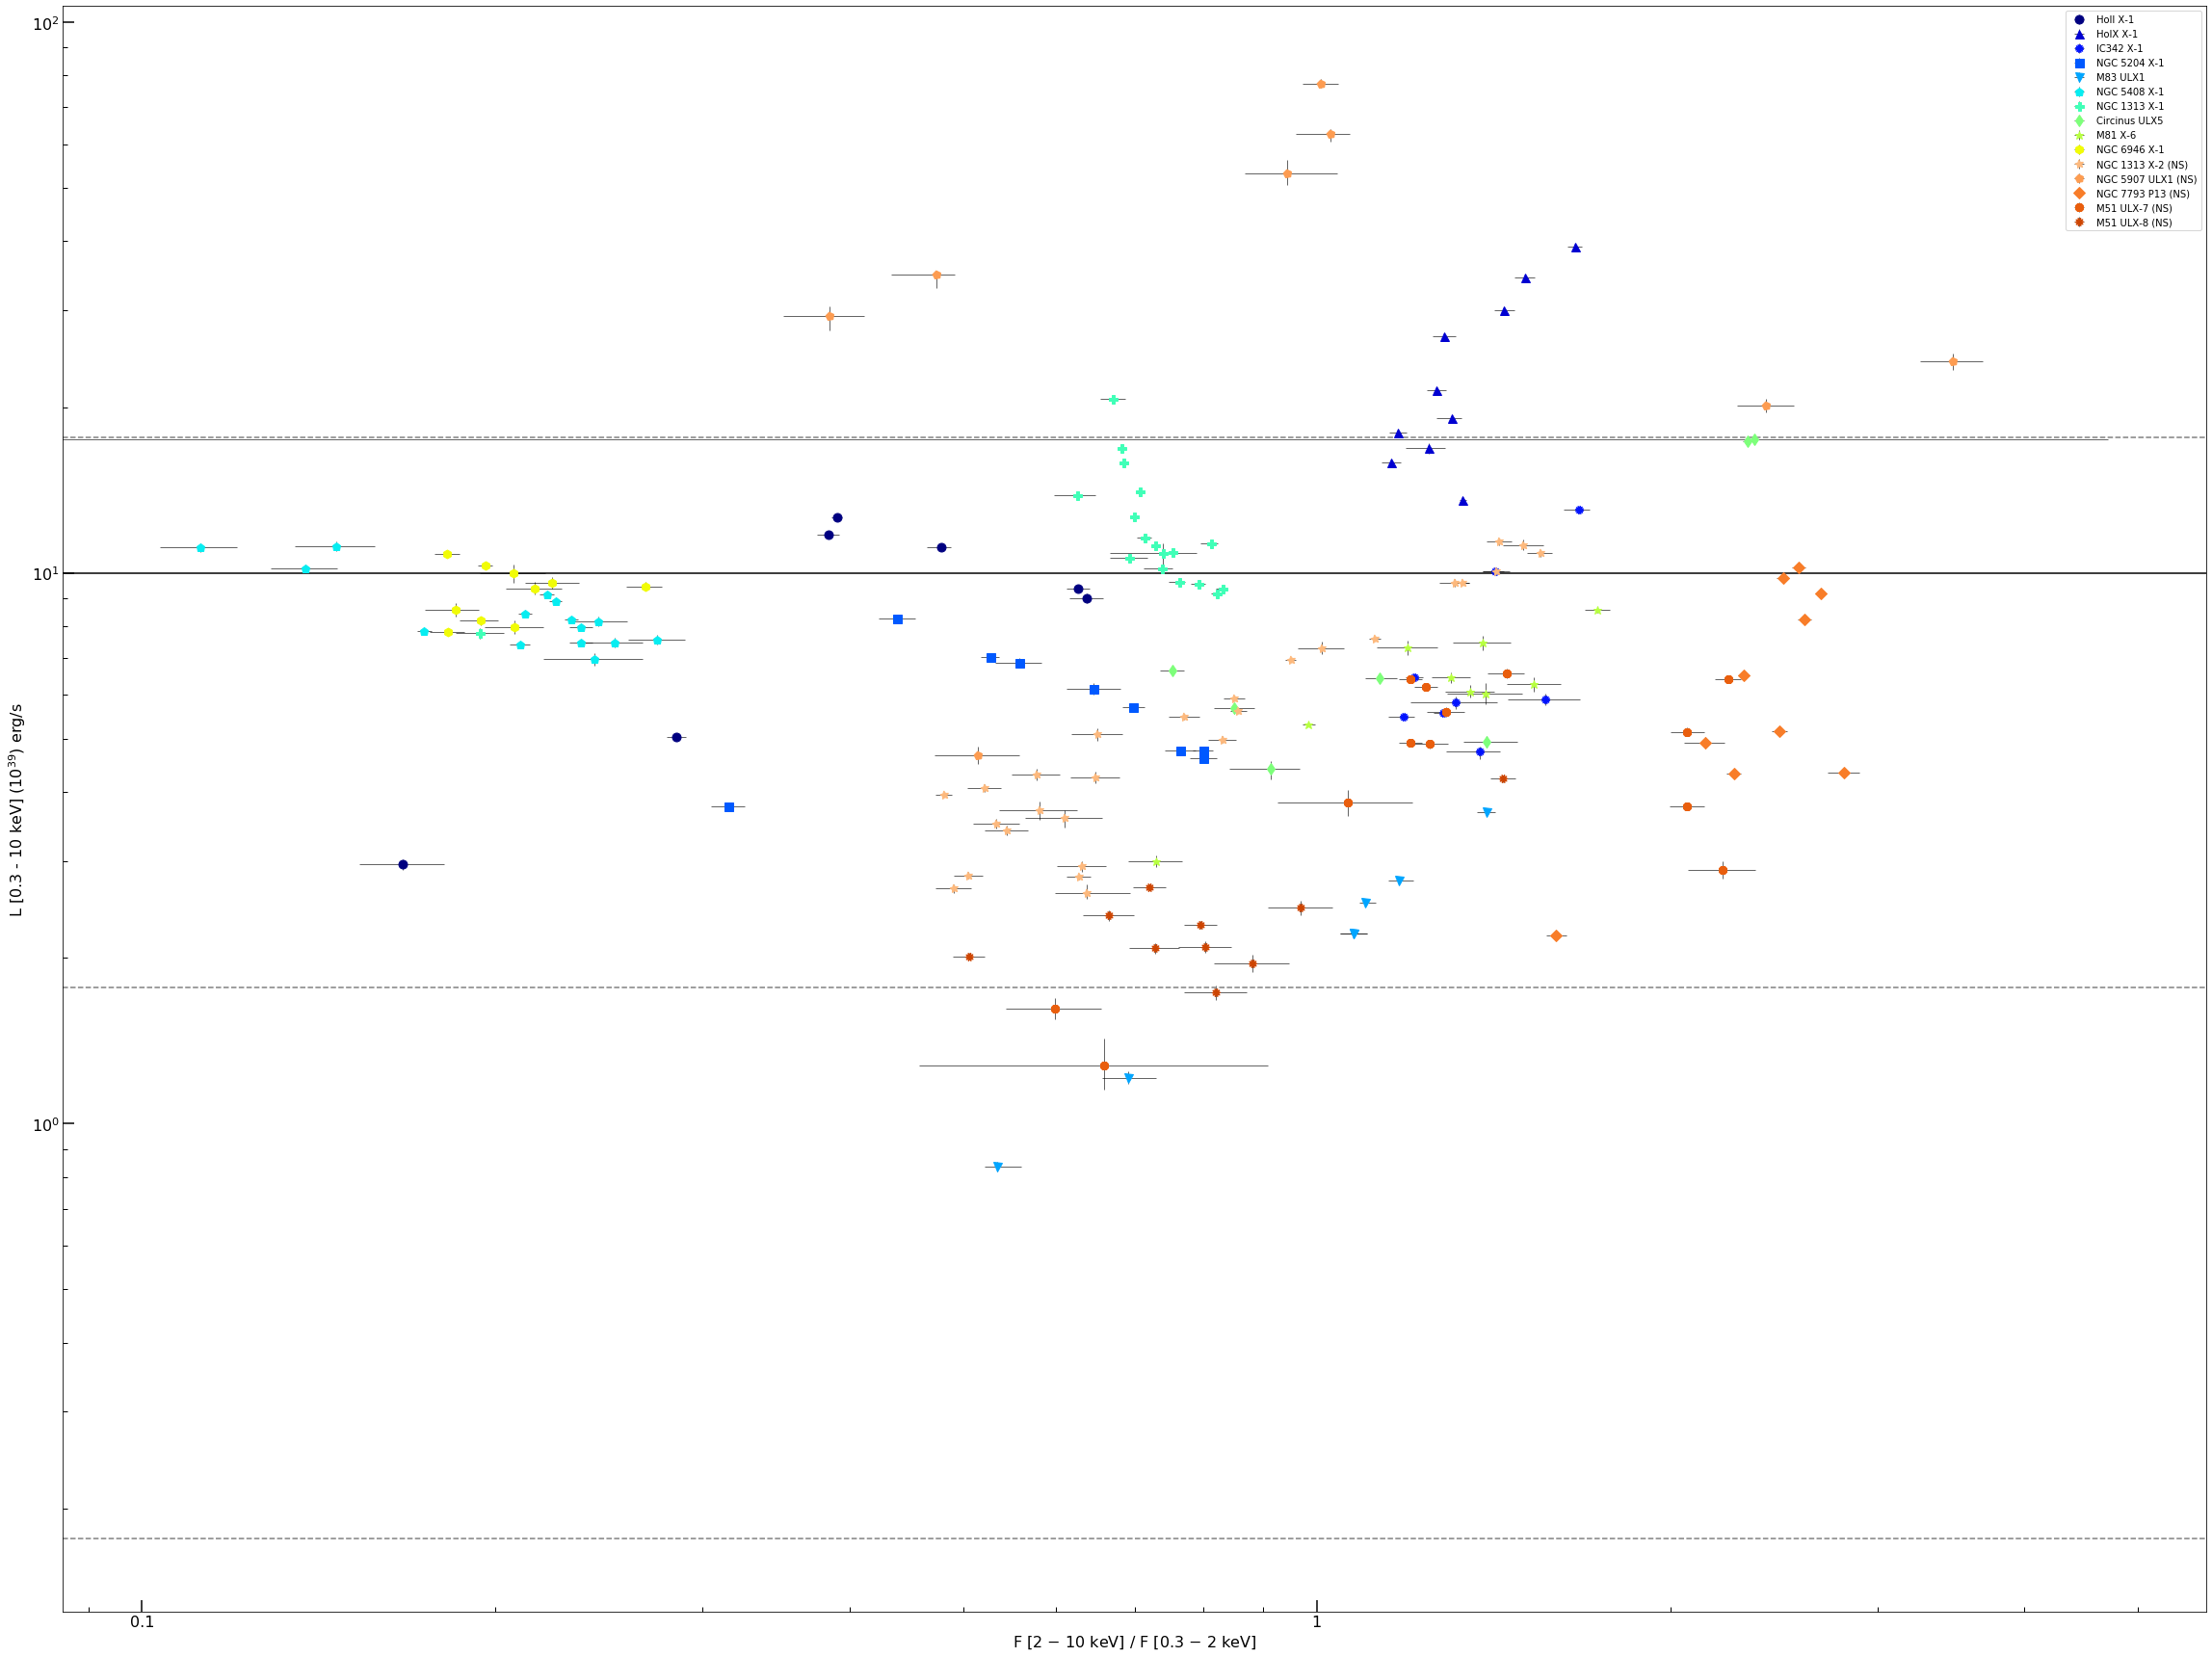

In [5]:
flux_time, flux_ax = plt.subplots(1, 1, figsize=(32, 24))
annotate=0
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
total_flux = "03100"
soft_band = "0320"
hard_band = "2010"
hardness_file_path = "/home/agurpide/x_ray_data/%s%s_hardness.dat" % (soft_band, hard_band)
if not os.path.isfile(hardness_file_path):
    hardness_file= open("%s" %hardness_file_path,"a+")
    hardness_file.write("#source\tmean_hardness\tmeanerr_low\tmeanerr_high\tmax_hardness\tmaxerr_low\tmaxerr_high\n")
else:
    hardness_file= open("%s" %hardness_file_path,"a")

for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    out_string_hardness = source_label
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    #constant = 1
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Plotting source %s" %source_dir)
    data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
    
    ratio_soft, ratio_err_low_soft, ratio_err_high_soft = compute_ratios(data["%s" %hard_band]* constant, 
                                                                         data["%s_lower" %hard_band]*constant,
                                                                         data["%s_upper" %hard_band]*constant , 
                                                      constant*data["%s" %soft_band], 
                                                                         constant*data["%s_lower"%soft_band],
                                                                         data["%s_upper" %soft_band]* constant)
    
    if "(NS" in source_label:
        current_marker = marker

        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
            index_ns+=1
        else:
            current_color=colors_ns[index_ns]
            index_ns+=1
        
    else:
        current_marker=marker
        current_color=color
        face_marker_color = current_color
    
    flux_ax.errorbar(ratio_soft, constant * data["%s" %total_flux], 
                 yerr=[constant * (data["%s" %total_flux] - data["%s_lower"%total_flux]), 
                       constant * (data["%s_upper" %total_flux]-data["%s" %total_flux])], 
                 xerr=[ratio_err_low_soft, ratio_err_high_soft], label=source_label, errorevery=1,
                 marker=current_marker, markersize=9, color=current_color, ecolor="black", elinewidth=0.6, ls="None")
    max_hardness_index = np.argmax(ratio_soft)
    out_string_hardness = "%s\t%.2f\t%.3f\t%.3f\t%.2f\t%.3f\t%.3f\n" % (out_string_hardness, 
                                                      np.mean(ratio_soft), 
                                       sum(ratio**2 for ratio in ratio_err_low_soft),
                                                      sum(ratio**2 for ratio in ratio_err_high_soft), np.max(ratio_soft), 
                                                                       ratio_err_low_soft[max_hardness_index], ratio_err_high_soft[max_hardness_index])
    print("Average hardness-ratio for %s is: %.2f" %(source_label, np.mean(ratio_soft)))
    hardness_file.write(out_string_hardness)

    
draw_arrows_flag = 0
if draw_arrows_flag:
        for i in np.arange(1, len(ratio_soft)):
            plt.annotate("", xy=(ratio_soft[i-1],constant * data["%s" %total_flux][i-1]), 
                         xytext=(ratio_soft[i], constant * data["%s" %total_flux][i]),
            arrowprops=dict(arrowstyle="<-", shrinkA=10, shrinkB=10, color=current_color))
        polygon_x = np.append(ratio_soft, ratio_soft[0])
        polygon_y = np.append(constant *data["%s" %total_flux], constant *data["%s" %total_flux][0])
    #plt.fill(polygon_x,polygon_y, alpha=0.1)

Ledd_NS = eddington_limit(1.4)
plt.axhline(y=Ledd_NS, ls='--', color='grey')
plt.axhline(y=Ledd_NS * 10, ls='--', color='grey')
plt.axhline(y=Ledd_NS * 100, ls='--', color='grey')

plt.axhline(y=10, ls='-', color='black')

addtext=0

if addtext:
    plt.text(0.1,Ledd_NS*1.1,'L$_{EDD_{NS}}$')
    plt.text(0.1,10*Ledd_NS*1.1,'10L$_{EDD_{NS}}$')
    plt.text(0.1,100*Ledd_NS*1.1,'100L$_{EDD_{NS}}$')
    plt.text(0.07,10*1.1,'L$_{Mushtukov}$')


plt.yscale("log")
plt.xscale("log")
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
flux_ax.xaxis.set_major_formatter(formatter)
plt.ylabel("L [0.3 - 10 keV] (10$^{39}$) erg/s")
plt.xlabel("F [2 $-$ 10 keV] / F [0.3 $-$ 2 keV]")
flux_ax.legend()
hardness_file.close()

## Ratio vs Ratio

In [20]:
ratio_figure, flux_ax = plt.subplots(1, 1, figsize=(8, 6))
##cmap = cm.get_cmap("Wistia")
#norm = cm.colors.Normalize(vmax=40, vmin=0)
#ratio_figure.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=flux_ax)
#flux_ax.set_prop_cycle(cycler('color', colors))
annotate=0
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
hard_band = "1025"
mid_band = "50100"
soft_band = "0325"
for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    #constant = 1
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Plotting source %s" %source_dir)
    data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
    ratio_hard, ratio_err_low_hard, ratio_err_high_hard = compute_ratios(data["%s" %hard_band], data["%s_lower" %hard_band],data["%s_upper" %hard_band] , 
                                                      data["%s" % mid_band], data["%s_lower"%mid_band] ,
                                                                         data["%s_upper"%mid_band])
    ratio_soft, ratio_err_low_soft, ratio_err_high_soft = compute_ratios(data["%s" %soft_band], data["%s_lower" %soft_band], data["%s_upper" %soft_band] , 
                                                      data["%s" % mid_band], data["%s_lower"%mid_band] ,
                                                                         data["%s_upper"%mid_band] )
    
    if "(NS" in source_label:
        current_marker = marker
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        #face_marker_colors = pulsations["PF"]
        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
            index_ns+=1
        else:
            current_color=colors_ns[index_ns]
            index_ns+=1
        for index, pf in enumerate(pulsations["PF"]):
            face_marker_color = pulse_fraction_to_color(pf, pulsations[index]["pulsations"])
            flux_ax.errorbar(ratio_hard[index], ratio_soft[index], 
                             xerr=[[ratio_err_low_hard[index]], [ratio_err_high_hard[index]]],
                             yerr=[[ratio_err_low_soft[index]],[ratio_err_high_soft[index]]],
                     marker=current_marker, markersize=9, color=current_color, ecolor="black", elinewidth=0.6, 
                    ls="None", label=source_label)
    else:
        current_marker=marker
        current_color=color
        face_marker_color = current_color
    
        flux_ax.errorbar(ratio_hard,ratio_soft,
                 xerr=[ratio_err_low_hard, ratio_err_high_hard], 
                 yerr=[ratio_err_low_soft, ratio_err_high_soft], label=source_label, errorevery=1,
                 marker=current_marker, markersize=9, color=current_color, ecolor="black", elinewidth=0.6, ls="None")
draw_arrows_flag = 0
if draw_arrows_flag:
        for i in np.arange(1, len(ratio_soft)):
            plt.annotate("", xy=(ratio_soft[i-1],constant * data["%s" %total_flux][i-1]), 
                         xytext=(ratio_soft[i], constant * data["%s" %total_flux][i]),
            arrowprops=dict(arrowstyle="<-", shrinkA=10, shrinkB=10, color=current_color))
        polygon_x = np.append(ratio_soft, ratio_soft[0])
        polygon_y = np.append(constant *data["%s" %total_flux], constant *data["%s" %total_flux][0])
    #plt.fill(polygon_x,polygon_y, alpha=0.1)

plt.yscale("log")
plt.xscale("log")

formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
flux_ax.xaxis.set_major_formatter(formatter)
plt.ylabel("F [2 - 5 keV]/F [5 - 10]")
plt.xlabel("F [10 - 25]/ F [5 -10]")
remove_legend_repetitions(flux_ax, 14)

Plotting source /home/agurpide/x_ray_data//holmbergIIX1/frozengamma
Plotting source /home/agurpide/x_ray_data//holmbergX9/frozengamma
Plotting source /home/agurpide/x_ray_data//IC342/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC5204X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//M83ULX3/joint_fit_2
Plotting source /home/agurpide/x_ray_data//NGC5408X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC1313X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//CircinusULX5/frozengamma
Plotting source /home/agurpide/x_ray_data//M81-X6/joint_fit_2
Plotting source /home/agurpide/x_ray_data//NGC55/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC6946X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC1313X-2/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC300ULX1/joint_fit_2
Plotting source /home/agurpide/x_ray_data//NGC5907/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC7793P13/joint_fit_2
Plotting source /home/agur

IndexError: index 10 is out of bounds for axis 0 with size 10

## Hardness ratio in two panels

In [17]:
flux_time, flux_ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True, sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})
plot_config = readbroadbandfile()
colors = create_color_array(len(plot_config["source_dir"]), "jet")
ns_sources = np.array([ns for ns in plot_config if "NS" in ns["source_name"]])
colors_ns = create_color_array(len(ns_sources) + 5  , "Oranges")
markers = get_markers_array(len(plot_config["source_dir"]))
#flux_ax.set_prop_cycle(cycler('color', colors))
annotate=0
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
total_flux = "03100"
for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    #constant =1
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Plotting source %s" %source_dir)
    data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
    
    ratio_soft, ratio_err_low_soft, ratio_err_high_soft = compute_ratios((data["2010"])* constant, 
                                                      (data["2010_lower"])* constant,
                                                                         (data["2010_upper"])* constant , 
                                                      constant*data["0320"], constant*data["0320_lower"],
                                                                         data["0320_upper"]* constant)
    
    if "(NS" in source_label:
        ax = flux_ax[1]
        current_marker = marker
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        face_marker_colors = pulsations_to_color(pulsations["pulsations"], pulsations["PF"])
        if "NGC5907" in source:
            current_color=colors_ns[index_ns]
            index_ns+=1
        else:
            current_color=colors_ns[index_ns]
            index_ns+=1
        for index, face_marker_color in enumerate(face_marker_colors):
            ax.errorbar(ratio_soft[index], constant * data["%s" %total_flux][index], 
                     marker=current_marker, markersize=9, color=current_color, ecolor="black", elinewidth=0.6, 
                    ls="None")
        
            
    else:
        ax = flux_ax[0]
        current_marker=marker
        current_color=color
        face_marker_color = current_color
    
        ax.errorbar(ratio_soft, constant * data["%s" %total_flux], 
                     yerr=[constant * (data["%s" %total_flux] - data["%s_lower" %total_flux]), 
                           constant * (data["%s_upper" %total_flux]-data["%s" %total_flux])], 
                     xerr=[ratio_err_low_soft, ratio_err_high_soft], label=source_label, errorevery=5,
                     marker=current_marker, markersize=9, color=current_color, ecolor="black", elinewidth=0.6, 
                    ls="None", markerfacecolor=face_marker_color)
    
    for i in np.arange(1, len(ratio_soft)):
        ax.annotate("", xy=(ratio_soft[i-1],constant * data["%s" %total_flux][i-1]), 
                    xytext=(ratio_soft[i], constant * data["%s" %total_flux][i]),
        arrowprops=dict(arrowstyle="<-", shrinkA=10, shrinkB=10, color=current_color))
    polygon_x = np.append(ratio_soft, ratio_soft[0])
    polygon_y = np.append(constant *data["%s" %total_flux], constant *data["%s" %total_flux][0])
    #plt.fill(polygon_x,polygon_y, alpha=0.1)
    if annotate:
        for index in np.arange(0, len(data["epoch"])):
            print("Plotting")
            #plt.annotate(index, (ratio_soft[index], constant *data["%s" %total_flux][index]))

Ledd_NS = eddington_limit(1.4)

for ax in flux_ax:
    ax.axhline(y=Ledd_NS, ls='--', color='grey')
    ax.axhline(y=Ledd_NS * 10, ls='--', color='grey')
    ax.axhline(y=Ledd_NS * 100, ls='--', color='grey')
    ax.axhline(y=10, ls='-', color='black')
    ax.legend()
    ax.set_xlabel("F [2 $-$ 10 keV] / F [0.3 $-$ 2 keV]")

addtext=1
if addtext:
    plt.text(0.1,Ledd_NS*1.1,'L$_{EDD_{NS}}$')
    plt.text(0.1,10*Ledd_NS*1.1,'10L$_{EDD_{NS}}$')
    plt.text(0.1,100*Ledd_NS*1.1,'100L$_{EDD_{NS}}$')
    plt.text(0.1,10*1.1,'L$_{Mushtukov}$')


plt.yscale("log")
plt.xscale("log")

formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
flux_ax[0].yaxis.set_major_formatter(formatter)

flux_ax[1].xaxis.set_major_formatter(formatter)
flux_ax[0].set_ylabel("L [0.3 - 10 keV] (10$^{39}$) erg/s")

[('source_dir', '<U13'), ('model_dir', '<U30'), ('source_name', '<U18'), ('distance', '<f8')]
Creating color array for 17 datasets
Creating color array for 11 datasets
Plotting source /home/agurpide/x_ray_data//holmbergIIX1/frozengamma
Plotting source /home/agurpide/x_ray_data//holmbergX9/frozengamma
Plotting source /home/agurpide/x_ray_data//IC342/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC5204X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//M83ULX3/joint_fit_2
Plotting source /home/agurpide/x_ray_data//NGC5408X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC1313X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//CircinusULX5/frozengamma
Plotting source /home/agurpide/x_ray_data//M81-X6/joint_fit_2
Plotting source /home/agurpide/x_ray_data//NGC55/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC6946X-1/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC1313X-2/frozengamma
Plotting source /home/agurpide/x_ray_data//NGC300ULX1

IndexError: index 10 is out of bounds for axis 0 with size 10

## GAMMA vs FRAC

In [295]:
gamma_outflow, gamma_ax = plt.subplots(1, 1, figsize=(16, 10))
disk_par = 'Gamma'
simpl_par = 'FracSctr'
second_comp = 'simpl_0'
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Found source %s" %source_dir)
    if not os.path.isfile("%s/components/simpl_0.dat" % source_dir):
                      continue
    simpl_data = read_comp_simpl("%s/components/simpl_0.dat" % source_dir)
    outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, second_comp))
    
    gamma_err_low, gamma_err_high, gamma_lolimits, gamma_uplimits = bounds_to_errors(simpl_data["%s" %simpl_par], 
                                                                                                 simpl_data["%slow" %simpl_par], 
                                                                                                 simpl_data["%supp" %simpl_par])

    print("Found %d observations" % len(outflow_data))
    if "(NS" in source_label:
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        pulsations = np.array([puls for puls in pulsations if puls["xmm_obsid"] in simpl_data["xmm_obsid"]])
        face_marker_colors = pulsations["pulsations"]
        ns_color = colors_ns[index_ns]
        index_ns+=1
        for index, pf in enumerate(pulsations["PF"]):
            face_marker_color = pulse_fraction_to_color(pf, pulsations[index]["pulsations"])
            plt.errorbar(simpl_data["%s" %simpl_par][index], outflow_data["%s" %disk_par][index],  
                 xerr=[[gamma_err_low[index]], [gamma_err_high[index]]], label=source_label,
                 marker=marker, markersize=10, xlolims=gamma_lolimits[index],
                     xuplims=gamma_uplimits[index], markerfacecolor=face_marker_color, color=ns_color)
    else:
        face_marker_color="None"
        for index in np.arange(0, len(outflow_data["epoch"])):
            plt.errorbar(simpl_data["%s" %simpl_par][index], outflow_data["%s" %disk_par][index],  
                 xerr=[[gamma_err_low[index]], [gamma_err_high[index]]], label=source_label,
                 marker=marker, markersize=10, xlolims=gamma_lolimits[index],
                     xuplims=gamma_uplimits[index], color=color)


plt.ylabel("%s" %disk_par)
plt.xlabel("%s" %simpl_par)
remove_legend_repetitions(gamma_ax, 14)

Found source /home/agurpide/x_ray_data//holmbergIIX1/frozengamma
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Found 7 observations
Found source /home/agurpide/x_ray_data//holmbergX9/frozengamma
Limit found
Limit found
Limit found
Limit found
Found 10 observations
Found source /home/agurpide/x_ray_data//IC342/frozengamma
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Found 6 observations
Found source /home/agurpide/x_ray_data//NGC5204X-1/frozengamma
Limit found
Limit found
Found 8 observations
Found source /home/agurpide/x_ray_data//M83ULX3/joint_fit_2
Limit found
Limit found
Warning upperbound is lower than value!!! 0.00000 < 0.13670
Found 1 observations
Found source /home/agurpide/x_ray_data//NGC5408X-1/frozengamma
Found 12 observations
Found source /home/agurpide/x_ray_data//NGC1313X-1/frozengamma
Limit found
Limit found
Limit found
Limit

## SIMPL FLUX VS GAMMA

In [280]:
gamma_outflow, gamma_ax = plt.subplots(1, 1, figsize=(16, 10))
disk_par = 'Tin'
simpl_par = 'flux'
second_comp = 'diskbb_0'
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Found source %s" %source_dir)
    if not os.path.isfile("%s/components/simpl_0.dat" % source_dir):
        simpl_data = read_comp_diskbb("%s/components/diskbb_1.dat" % (source_dir))
    else:
        simpl_data = read_comp_simpl("%s/components/simpl_0.dat" % source_dir)
    outflow_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, second_comp))
    outflow_data = np.array([outflow for outflow in outflow_data if outflow["xmm_obsid"] in simpl_data["xmm_obsid"]])
    if simpl_par=='flux':
        simpl_data["flux"] = simpl_data["flux"] * constant
        simpl_data["fluxupp"] = simpl_data["fluxupp"] * constant
        simpl_data["fluxlow"] =simpl_data["fluxlow"] * constant
        
    gamma_err_low, gamma_err_high, gamma_lolimits, gamma_uplimits = bounds_to_errors(simpl_data["%s" %simpl_par], 
                                                                                     simpl_data["%slow" %simpl_par], 
                                                                                                 simpl_data["%supp" %simpl_par])
    if disk_par=="flux":
        outflow_data["flux"] = outflow_data["flux"] * constant
        outflow_data["fluxupp"] = outflow_data["fluxupp"] * constant
        outflow_data["fluxlow"] =outflow_data["fluxlow"] * constant

    print("Found %d observations" % len(outflow_data))
    if "(NS" in source_label:
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        pulsations = np.array([puls for puls in pulsations if puls["xmm_obsid"] in simpl_data["xmm_obsid"]])
        face_marker_colors = pulsations["pulsations"]
        ns_color = colors_ns[index_ns]
        index_ns+=1
        for index, pf in enumerate(pulsations["PF"]):
            face_marker_color = pulse_fraction_to_color(pf, pulsations[index]["pulsations"])
            plt.errorbar(simpl_data["%s" %simpl_par][index], outflow_data["%s" %disk_par][index],  
                 xerr=[[gamma_err_low[index]], [gamma_err_high[index]]], label=source_label,
                 marker=marker, markersize=10, xlolims=gamma_lolimits[index],
                     xuplims=gamma_uplimits[index], markerfacecolor=face_marker_color, color=ns_color)
    else:
        face_marker_color="None"
        for index in np.arange(0, len(outflow_data["epoch"])):
            plt.errorbar(simpl_data["%s" %simpl_par][index], outflow_data["%s" %disk_par][index],  
                 xerr=[[gamma_err_low[index]], [gamma_err_high[index]]], label=source_label,
                 marker=marker, markersize=10, xlolims=gamma_lolimits[index],
                     xuplims=gamma_uplimits[index], color=color)


plt.ylabel("%s %s" %(disk_par, second_comp))
plt.xlabel("%s" %simpl_par)
remove_legend_repetitions(gamma_ax, 14)

Found source /home/agurpide/x_ray_data//holmbergIIX1/frozengamma
Limit found
Limit found
Limit found
Limit found
Found 7 observations
Found source /home/agurpide/x_ray_data//holmbergX9/frozengamma
Limit found
Limit found
Found 10 observations
Found source /home/agurpide/x_ray_data//IC342/frozengamma
Limit found
Limit found
Limit found
Limit found
Limit found
Limit found
Found 6 observations
Found source /home/agurpide/x_ray_data//NGC5204X-1/joint_fit_2


OSError: /home/agurpide/x_ray_data//NGC5204X-1/joint_fit_2/components/diskbb_1.dat not found.

## Comptonization importance vs total flux

In [225]:
comtponization_importance, comptonization_ax = plt.subplots(1, 1, figsize=(16, 10))
simpl_par = 'flux'
second_comp = 'diskbb_1'
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
total_flux = "0325"
comptonization_ax.set_ylabel("L (10$^{39}$ erg/s)")
comptonization_ax.set_xlabel("Comptonized flux (%)")
for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Found source %s" %source_dir)
    component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, second_comp))
    if os.path.isfile("%s/components/simpl_0.dat" % source_dir):
        simpl_data = read_comp_simpl("%s/components/simpl_0.dat" % source_dir)
        component_data = np.array([component for component in component_data if component["xmm_obsid"] in simpl_data["xmm_obsid"]])
        fluxcomp_err_low, fluxcomp_err_high, fluxcomp_lolimits, fluxcomp_uplimits = bounds_to_errors(component_data["%s" %"flux"], 
                                                                                                 component_data["%slow" %"flux"], 
                                                                                                 component_data["%supp" %"flux"])

        fluxsimpl_err_low, fluxsimpl_err_high, fluxsimpl_lolimits, fluxsimpl_uplimits = bounds_to_errors(simpl_data["%s" %simpl_par], 
                                                                                                 simpl_data["%slow" %simpl_par], 
                                                                                                 simpl_data["%supp" %simpl_par])
        
        component_data["flux"] =  (simpl_data["%s" %simpl_par] - component_data["flux"]) / simpl_data["%s" %simpl_par]
        # add errors
        fluxcomp_err_high= fluxcomp_err_high + fluxsimpl_err_high
        fluxcomp_err_low = fluxcomp_err_low + fluxsimpl_err_low
    else:
        
        fluxcomp_err_low, fluxcomp_err_high, fluxcomp_lolimits, fluxcomp_uplimits = bounds_to_errors(component_data["%s" %"flux"], 
                                                                                                 component_data["%slow" %"flux"], 
                                                                                                 component_data["%supp" %"flux"])

        
    flux_data = read_flux_data("%s/fluxes/fluxes.dat" % source_dir)
    flux_data = np.array([flux for flux in flux_data if flux["xmm_obsid"] in component_data["xmm_obsid"]])

    print("Found %d observations" % len(flux_data))
    if "(NS" in source_label:
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        pulsations = np.array([puls for puls in pulsations if puls["xmm_obsid"] in component_data["xmm_obsid"]])
        face_marker_colors = pulsations_to_color(pulsations["pulsations"], pulsations["PF"])
        ns_color = colors_ns[index_ns]
        index_ns+=1
        for index, pf in enumerate(pulsations["PF"]):
            face_marker_color = pulse_fraction_to_color(pf, pulsations[index]["pulsations"])
            plt.errorbar(component_data["%s" %"flux"][index], flux_data["%s" %total_flux][index] * constant,  
                 yerr=[[constant*(flux_data["%s" %total_flux] - flux_data["%s_lower" %total_flux])[index]], 
                       [constant*(flux_data["%s_upper" %total_flux] - flux_data["%s" %total_flux])[index]]], 
                         label=source_label, xerr=[[fluxcomp_err_low[index]], [fluxcomp_err_high[index]]],
                 marker=marker, markersize=10,markerfacecolor=face_marker_color, color=ns_color)
    else:
        face_marker_color="None"
        for index in np.arange(0, len(flux_data["epoch"])):
            plt.errorbar(component_data["%s" %"flux"][index], flux_data["%s" %total_flux][index] * constant,   
                                  yerr=[[constant*(flux_data["%s" %total_flux] - flux_data["%s_lower" %total_flux])[index]], 
                       [constant*(flux_data["%s_upper" %total_flux] - flux_data["%s" %total_flux])[index]]],
                         xerr=[[fluxcomp_err_low[index]],[fluxcomp_err_high[index]]], label=source_label,marker=marker, markersize=10,
                     color=color)



remove_legend_repetitions(comptonization_ax, 14)

Found source /home/agurpide/x_ray_data//holmbergIIX1/joint_fit_2
Limit found
Found 7 observations
Found source /home/agurpide/x_ray_data//holmbergX9/joint_fit_2
Limit found
Found 10 observations
Found source /home/agurpide/x_ray_data//IC342/joint_fit_2
Limit found
Found 6 observations
Found source /home/agurpide/x_ray_data//NGC5204X-1/joint_fit_2
Found 8 observations
Found source /home/agurpide/x_ray_data//M83ULX3/joint_fit_2
Limit found
Found 1 observations
Found source /home/agurpide/x_ray_data//NGC5408X-1/joint_fit_2
Limit found
Limit found
Found 12 observations
Found source /home/agurpide/x_ray_data//NGC1313X-1/joint_fit_2
Limit found
Limit found
Limit found
Found 18 observations
Found source /home/agurpide/x_ray_data//CircinusULX5/joint_fit_2
Limit found
Found 6 observations
Found source /home/agurpide/x_ray_data//M81-X6/joint_fit_2
Limit found
Limit found
Found 14 observations
Found source /home/agurpide/x_ray_data//NGC55/joint_fit_2
Limit found
Limit found
Found 3 observations
F

In [ ]:
## L soft vs Comptonization importance

In [224]:
comtponization_importance, comptonization_ax = plt.subplots(1, 1, figsize=(16, 10))
simpl_par = 'flux'
second_comp = 'diskbb_1'
first_comp = 'diskbb_1'
common_dir = "/home/agurpide/x_ray_data/"
index_ns = 3
comptonization_ax.set_ylabel("L soft (0.01 - 100 keV)")
comptonization_ax.set_xlabel("Comptonized flux (0.01 - 100 keV)")
comptonization_ax.set_yscale("log")
for source, source_label, model_dir, distance, color, marker in zip(plot_config["source_dir"], 
                                                     plot_config["source_name"], 
                                                     plot_config["model_dir"], 
                                                     plot_config["distance"], colors, markers):
    parsecs = distance * m.pow(10, 6)
    # parsecs to cm
    distancecm = u.pc.to(u.cm, parsecs)
    constant = 4 * m.pi * distancecm ** 2 / 10**39
    source_dir = "%s/%s/%s" %(common_dir, source, model_dir)
    print("Found source %s" %source_dir)
    component_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, second_comp))
    if os.path.isfile("%s/components/simpl_0.dat" % source_dir):
        simpl_data = read_comp_simpl("%s/components/simpl_0.dat" % source_dir)
        component_data = np.array([component for component in component_data if component["xmm_obsid"] in simpl_data["xmm_obsid"]])
        fluxcomp_err_low, fluxcomp_err_high, fluxcomp_lolimits, fluxcomp_uplimits = bounds_to_errors(component_data["%s" %"flux"], 
                                                                                                 component_data["%slow" %"flux"], 
                                                                                                 component_data["%supp" %"flux"])

        fluxsimpl_err_low, fluxsimpl_err_high, fluxsimpl_lolimits, fluxsimpl_uplimits = bounds_to_errors(simpl_data["%s" %simpl_par], 
                                                                                                 simpl_data["%slow" %simpl_par], 
                                                                                                 simpl_data["%supp" %simpl_par])
        
        component_data["flux"] = (component_data["flux"] - simpl_data["%s" %simpl_par]) / simpl_data["%s" %simpl_par]   
        # add errors
        fluxcomp_err_high= fluxcomp_err_high + fluxsimpl_err_high
        fluxcomp_err_low = fluxcomp_err_low + fluxsimpl_err_low
    else:
        continue
        
    first_comp_data = read_comp_diskbb("%s/components/%s.dat" % (source_dir, first_comp))
    first_comp_data = np.array([flux for flux in first_comp_data if flux["xmm_obsid"] in component_data["xmm_obsid"]])

    print("Found %d observations" % len(first_comp_data))
    if "(NS" in source_label:
        pulsations =read_pulsations_file("%s/%s/pulsations.txt" %(common_dir,source))
        pulsations = np.array([puls for puls in pulsations if puls["xmm_obsid"] in component_data["xmm_obsid"]])
        face_marker_colors = pulsations_to_color(pulsations["pulsations"], pulsations["PF"])
        ns_color = colors_ns[index_ns]
        index_ns+=1
        for index, pf in enumerate(pulsations["PF"]):
            face_marker_color = pulse_fraction_to_color(pf, pulsations[index]["pulsations"])
            plt.errorbar(component_data["%s" %"flux"][index], first_comp_data["%s" %"flux"][index] * constant,  
                 yerr=[[constant*(first_comp_data["%s" %"flux"] - first_comp_data["%slow" %"flux"])[index]], 
                       [constant*(first_comp_data["%supp" %"flux"] - first_comp_data["%s" %"flux"])[index]]], 
                         label=source_label, xerr=[[fluxcomp_err_low[index]], [fluxcomp_err_high[index]]],
                 marker=marker, markersize=10,markerfacecolor=face_marker_color, color=ns_color)
    else:
        face_marker_color="None"
        for index in np.arange(0, len(first_comp_data["epoch"])):
            plt.errorbar(component_data["%s" %"flux"][index], first_comp_data["%s" %"flux"][index] * constant,   
                                  yerr=[[constant*(first_comp_data["%s" %'flux'] - first_comp_data["%slow" %"flux"])[index]], 
                       [constant*(first_comp_data["%supp" %"flux"] - first_comp_data["%s" %"flux"])[index]]],
                         xerr=[[fluxcomp_err_low[index]],[fluxcomp_err_high[index]]], label=source_label,marker=marker, markersize=10,
                     color=color)

remove_legend_repetitions(comptonization_ax, 14)

Found source /home/agurpide/x_ray_data//holmbergIIX1/joint_fit_2
Limit found
Found 7 observations
Found source /home/agurpide/x_ray_data//holmbergX9/joint_fit_2
Limit found
Limit found
Found 10 observations
Found source /home/agurpide/x_ray_data//IC342/joint_fit_2
Limit found
Found 6 observations
Found source /home/agurpide/x_ray_data//NGC5204X-1/joint_fit_2
Found 8 observations
Found source /home/agurpide/x_ray_data//M83ULX3/joint_fit_2
Limit found
Found 1 observations
Found source /home/agurpide/x_ray_data//NGC5408X-1/joint_fit_2
Limit found
Limit found
Limit found
Found 12 observations
Found source /home/agurpide/x_ray_data//NGC1313X-1/joint_fit_2
Limit found
Limit found
Limit found
Limit found
Found 18 observations
Found source /home/agurpide/x_ray_data//CircinusULX5/joint_fit_2
Limit found
Found 6 observations
Found source /home/agurpide/x_ray_data//M81-X6/joint_fit_2
Limit found
Limit found
Found source /home/agurpide/x_ray_data//NGC55/joint_fit_2
Limit found
Limit found
Found 3 